# Business Case for Data Analysis on Dermatological Conditions
**Background**
* The dataset includes clinical features related to dermatological conditions, possibly aimed at identifying patterns or classifying conditions based on various symptoms and characteristics. The features include symptoms like erythema, scaling, and itching, along with demographic information such as age and class labels representing different conditions.

**Objective**
* To analyze the dataset to identify patterns, correlations, and potential predictors of different dermatological conditions. This analysis can aid in clinical decision-making, improve patient outcomes, and support the development of targeted treatment plans.

# Problem Definition
* **Challenge:** There is a lack of comprehensive understanding of how various clinical features contribute to the classification of dermatological conditions. Healthcare providers may not have access to data-driven insights to support accurate diagnosis and treatment planning.

* **Goals:** Identify key clinical features that are most predictive of different dermatological conditions.
Develop a model to classify patients based on their clinical symptoms.
Provide insights that can guide healthcare professionals in making informed decisions.
* **Scope:** The analysis will focus on the relationships between various symptoms, patient demographics (age), and their respective classes of dermatological conditions.

**Importing necessary libraries**

In [1]:
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
import numpy as np # for numrical and statistical calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import warnings # for the warnings
warnings.filterwarnings('ignore') # use for ignore the warning

In [2]:
data = pd.read_csv("dataset_35_dermatology (1).csv") # Load the dataset_35_dermatology (1).csv file

In [3]:
pd.set_option('display.max_columns', None) # for see all columns

## Data Understanding
* **Explore the Data:**
  * Check the data types of each column.
  * Understand the categorical and numerical features.
  * Identify missing values or inconsistencies.

### **Basic check**

In [4]:
data.head() # See the data top rows

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [5]:
 data.tail() # See the data last rows

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


In [6]:
data.info() # Check the data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

#### **Insights**
* Here we can se the Age columns has object data type so we can change it in int datatype

#### **Column Explanations**

* **erythema:** Numeric representation of the presence or severity of erythema (redness of the skin).

* **scaling:** Numeric representation of the degree of scaling (flaking) on the skin.

* **definite_borders:** Indicator of whether the lesions have well-defined borders (1 for yes, 0 for no).

* **itching:** Numeric score indicating the severity of itching experienced by the patient.

* **koebner_phenomenon:** Indicates the presence of the Koebner phenomenon (lesion formation at sites of trauma); typically scored as 1 (present) or 0 (absent).

* **polygonal_papules:** Numeric representation of the presence of polygonal papules (small, raised lesions).

* **follicular_papules:** Numeric representation of the presence of follicular papules (papules arising from hair follicles).

* **oral_mucosal_involvement:** Indicates whether there is involvement of the oral mucosa; scored as 1 (yes) or 0 (no).

* **knee_and_elbow_involvement:** Indicates involvement of the knees and elbows; scored as 1 (yes) or 0 (no).

* **scalp_involvement:** Indicates whether the scalp is affected; scored as 1 (yes) or 0 (no).

* **family_history:** Indicates if there is a family history of the condition; scored as 1 (yes) or 0 (no).

* **melanin_incontinence:** Numeric representation of melanin incontinence (loss of melanin from the epidermis).

* **eosinophils_in_the_infiltrate:** Numeric score indicating the presence of eosinophils in the infiltrate.

* **PNL_infiltrate:** Numeric representation of polymorphonuclear leukocytes (PMNs) in the infiltrate.

* **fibrosis_of_the_papillary_dermis:** Numeric score indicating the presence of fibrosis in the papillary dermis.

* **exocytosis:** Indicates the presence of exocytosis (leakage of cells from the epidermis); typically scored as 1 (yes) or 0 (no).

* **acanthosis:** Numeric score indicating the thickness of the stratum corneum (upper layer of skin).

* **hyperkeratosis:** Numeric representation of thickening of the outer layer of the skin.

* **parakeratosis:** Numeric representation of the presence of parakeratosis (retention of nuclei in the stratum corneum).

* **clubbing_of_the_rete_ridges:** Indicates whether there is clubbing of the rete ridges; scored as 1 (yes) or 0 (no).

* **elongation_of_the_rete_ridges:** Numeric representation of the elongation of rete ridges in the skin.

* **thinning_of_the_suprapapillary_epidermis:** Numeric score indicating thinning of the epidermis above the papillary dermis.

* **spongiform_pustule:** Indicates the presence of spongiform pustules; typically scored as 1 (yes) or 0 (no).

* **munro_microabcess:** Indicates the presence of Munro microabscesses; typically scored as 1 (yes) or 0 (no).

* **focal_hypergranulosis:** Numeric score indicating the presence of focal hypergranulosis (increase in granular layer).

* **disappearance_of_the_granular_layer:** Indicates whether the granular layer is absent; scored as 1 (yes) or 0 (no).

* **vacuolisation_and_damage_of_basal_layer:** Numeric score indicating vacuolization and damage to the basal layer of the epidermis.

* **spongiosis:** Numeric representation of the presence of spongiosis (intercellular edema in the epidermis).

* **saw-tooth_appearance_of_retes:** Indicates whether a saw-tooth appearance of the rete ridges is present; scored as 1 (yes) or 0 (no).

* **follicular_horn_plug:** Numeric representation of the presence of follicular horn plugs.

* **perifollicular_parakeratosis:** Indicates the presence of perifollicular parakeratosis; scored as 1 (yes) or 0 (no).

* **inflammatory_monoluclear_inflitrate:** Numeric representation of the presence of mononuclear inflammatory infiltrate.

* **band-like_infiltrate:** Indicates whether a band-like infiltrate is present; scored as 1 (yes) or 0 (no).

* **Age:** The age of the patient; represented as an object type (likely a string).

* **class:** Numeric classification of the dermatological condition, where different integers represent different conditions.

In [7]:
data.isnull().sum() # Identify missing values or inconsistencies.

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

#### **Insights**
  * There are no null values in column

In [8]:
data.describe() # Here we can can see the statistical information of numerical columns

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


#### **insights**
**Symptoms and Features:** 
  * Erythema and scaling are common, with means of 2.07 and 1.80, respectively, indicating moderate presence in subjects.
  * Definite borders have a mean of 1.55, suggesting a significant number of cases show this characteristic.
  * Itching is reported with a mean of 1.37, indicating a noticeable symptom among patients.

**Koebner Phenomenon:** 
  * Present in about 63% of cases (mean of 0.63), indicating skin lesions may appear at sites of trauma.

**Family History:** 
  * Only 12.5% of patients report a family history (mean of 0.13), which may suggest a lesser genetic component in this cohort.

**Dermatological Findings:** 
  * Acanthosis and hyperkeratosis are prevalent (means of 1.37 and 1.96), indicating skin thickening is a common histological finding.
  * Eosinophils in the infiltrate show a mean of 0.14, indicating low presence, while inflammatory mononuclear infiltrate has a mean of 1.87, suggesting an inflammatory response.

**Papular Lesions:**

  * Polygonal papules (mean of 0.45) and follicular papules (mean of 0.17) are less common compared to other features.

**Scalp and Joint Involvement:**

  * Involvement of the scalp (mean of 0.52) and knees/elbows (mean of 0.37) indicates the areas affected can vary among patients.

**Histological Characteristics:**

  * High frequencies of spongiosis (mean of 2.80), band-like infiltrate (mean of 2.80), and thinning of the suprapapillary epidermis suggest significant changes in skin architecture.
  * Features like vacuolization and damage of the basal layer (mean of 0.55) indicate potential underlying damage in the epidermis.

In [9]:
data.describe(include="O") # Here we can can see the statistical information of categorical columns

,Age
count,366
unique,61
top,40
freq,17


#### **Insights**
**Age**
  * Age Diversity: The dataset includes 61 unique ages, indicating a wide range of ages represented.
  * Most Common Age: The most frequent age is 40, occurring 17 times, suggesting this age group is particularly prevalent in the dataset.

## Data Exploration and Cleaning

* **Objective:** Understand the dataset and identify any missing or inconsistent values.

* **Actions:**
  * Perform exploratory data analysis (EDA) to summarize the main characteristics of the dataset.
  * Identify and handle missing values using techniques such as imputation or removal.
  * Convert categorical variables (e.g., thal, chest pain type) into numerical representations if necessary.

## Exploratory Data Analysis (EDA)
### **Univariate Analysis:**
  * Visualize distributions of features.

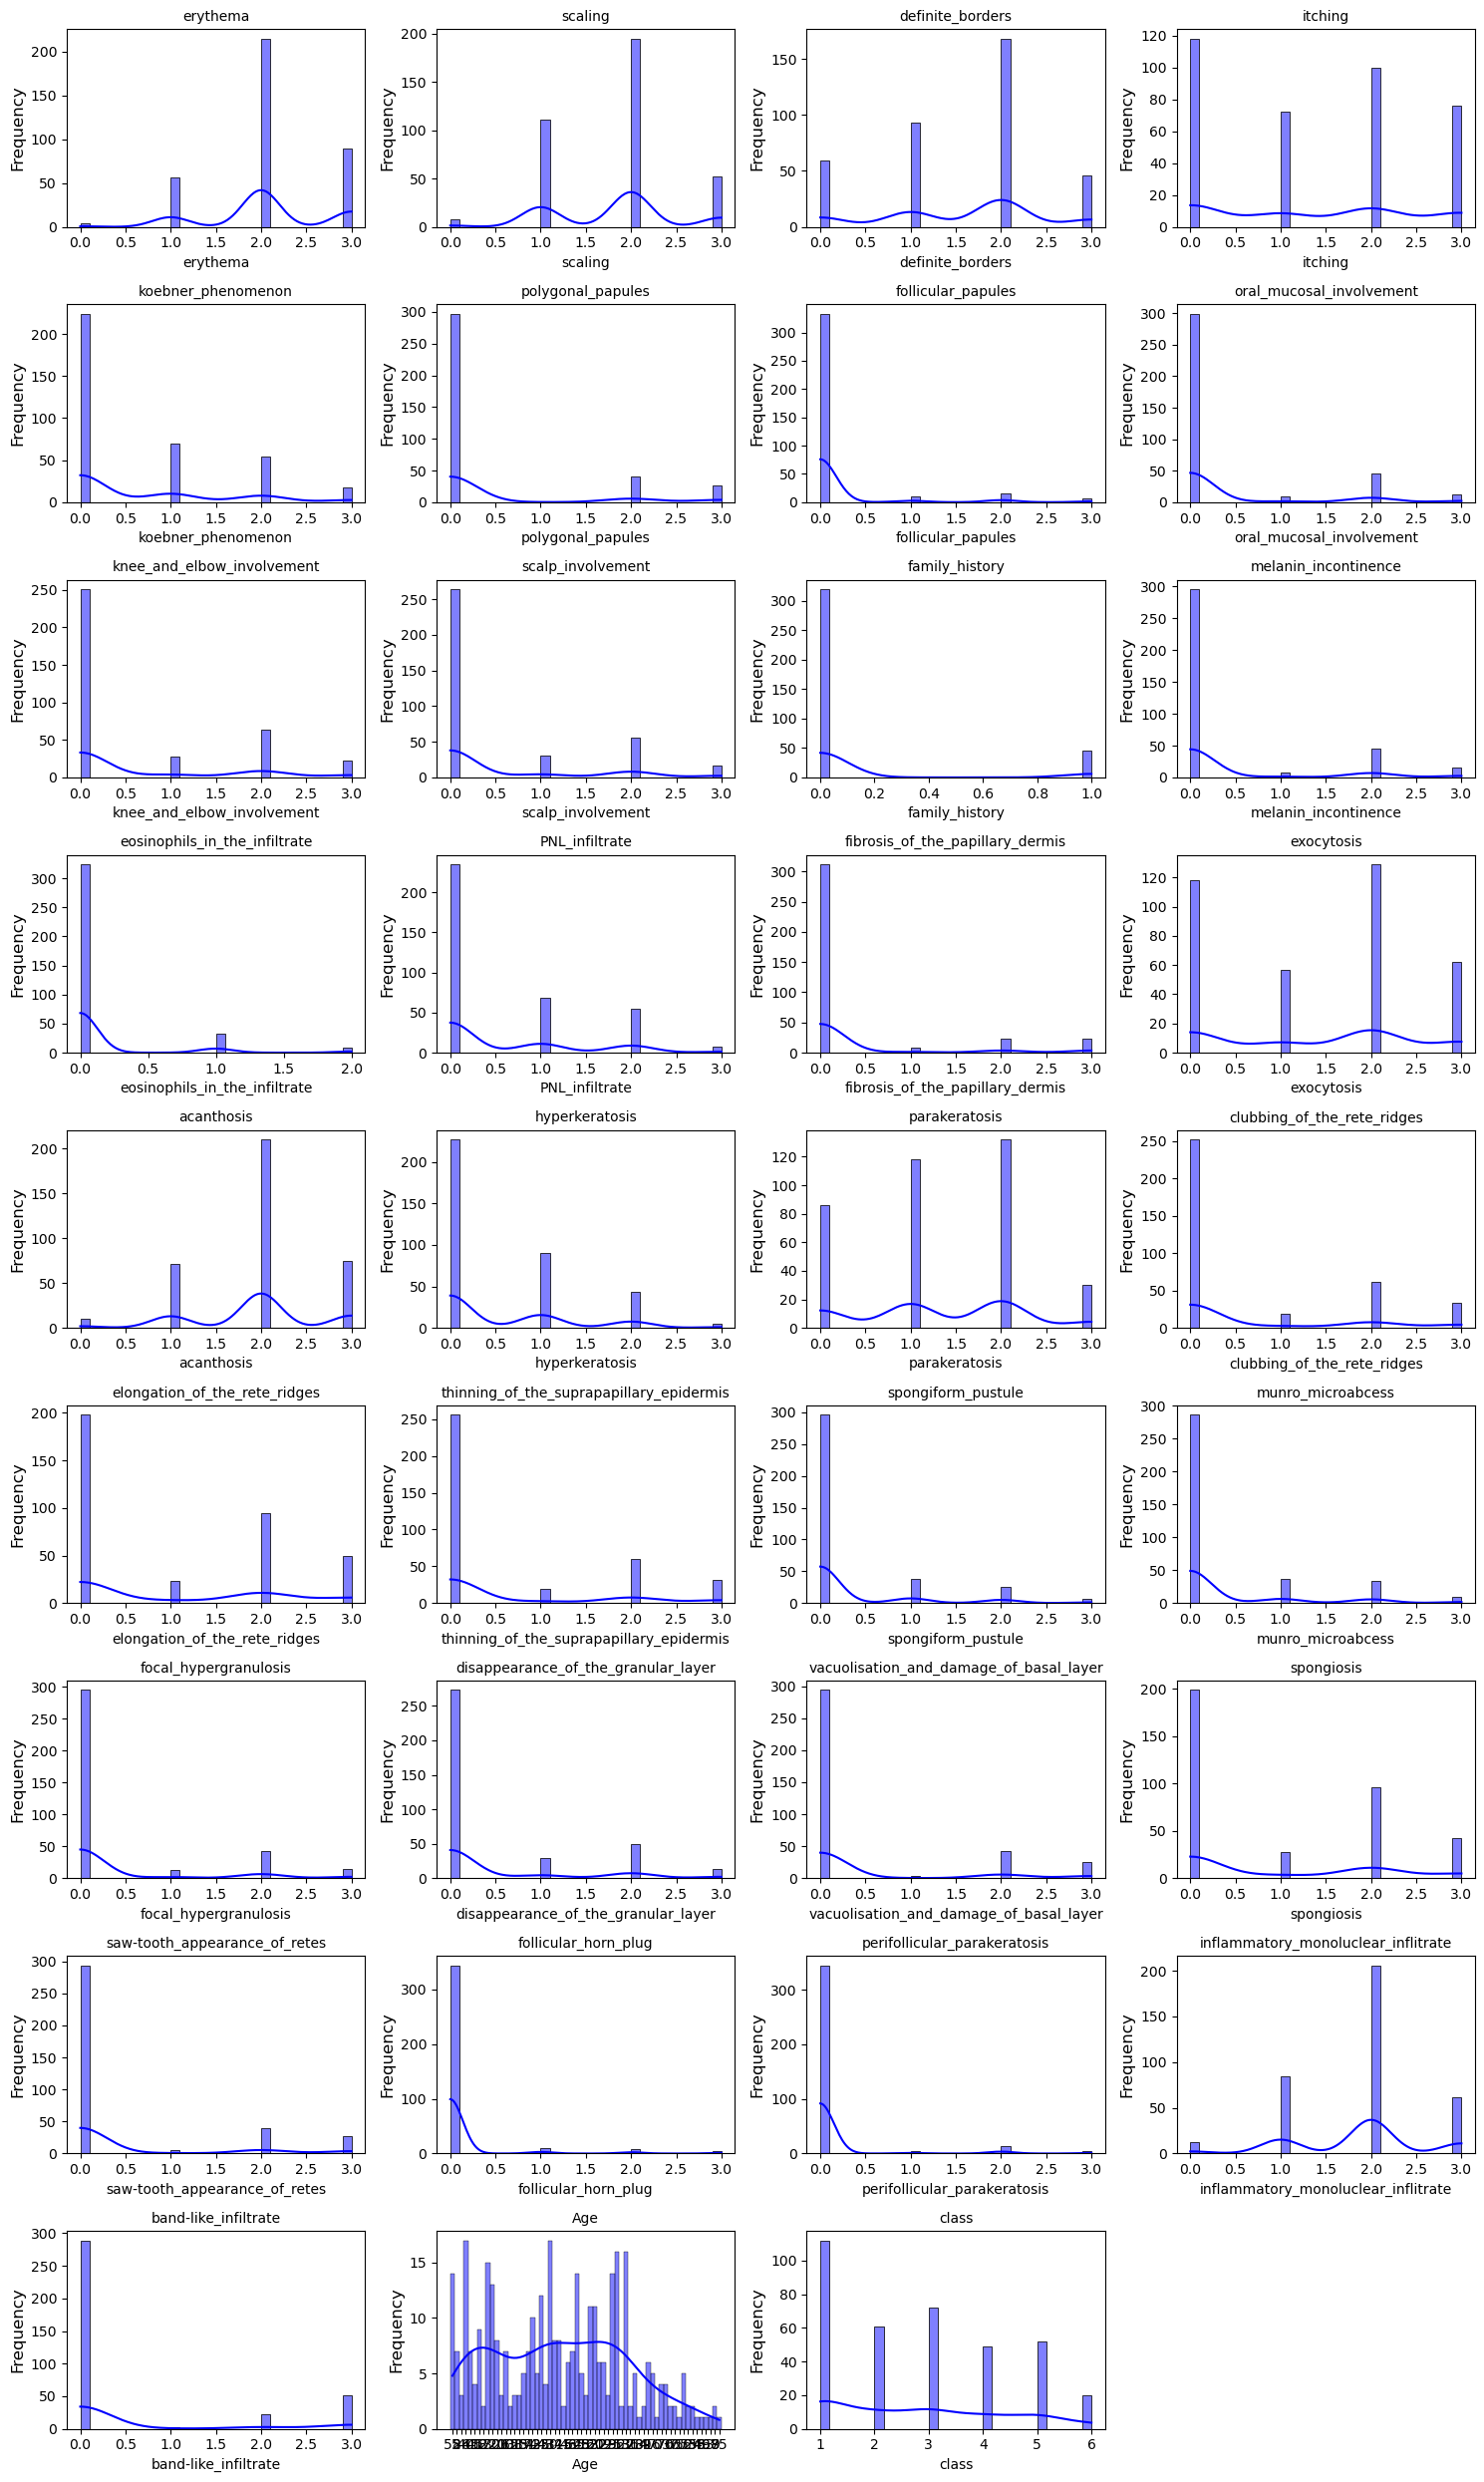

In [10]:
plt.figure(figsize=(15, 25))  # figure size

# Set the number of features and determine the layout
num_features = len(data.columns) # calculate the number of columns
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(data.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num) # here we set the sub plot 
    sns.histplot(data[feature], kde=True, bins=30, color='blue')  # Using sns.histplot with kde
    plt.title(feature, fontsize=10) # set the size of title
    plt.ylabel('Frequency', fontsize=12) # set the size of y

# Show all plots at once
plt.tight_layout()  # This helps in adjusting subplots to fit into the figure area.
plt.show() # show the the graph

#### **Insights:**

* **Erythema and Scaling:** These two features appear to be the most common, with high frequencies at lower values. This suggests that many dermatological conditions present with some degree of redness and scaling.
* **Definite Borders:** This feature shows a more even distribution, indicating that the presence or absence of definite borders is not as strongly associated with certain conditions.
* **Itching:** While itching is a common symptom, its distribution is relatively low compared to other features. This suggests that not all dermatological conditions are associated with significant itching.
* **Koebner Phenomenon:** This feature has a low frequency, suggesting that it is not a common characteristic of the conditions represented in the dataset.
* **Polygonal Papules:** Similar to Koebner phenomenon, polygonal papules have a low frequency, indicating that they are not a prominent feature in these conditions.
* **Follicular Papules:** This feature also has a low frequency, suggesting that it is not a common characteristic of the conditions represented in the dataset.
* **Oral Mucosal Involvement:** This feature has a low frequency, suggesting that oral mucosal involvement is not a common characteristic of the conditions represented in the dataset.
* **Knee and Elbow Involvement:** This feature has a low frequency, suggesting that involvement of the knees and elbows is not a common characteristic of the conditions represented in the dataset.
* **Scalp Involvement:** This feature has a low frequency, suggesting that scalp involvement is not a common characteristic of the conditions represented in the dataset.
* **Family History:** This feature has a low frequency, suggesting that a family history of skin conditions is not a common characteristic of the conditions represented in the dataset.
* **Melanin Incontinence:** This feature has a low frequency, suggesting that melanin incontinence is not a common characteristic of the conditions represented in the dataset.
* **Infiltration:** Features related to infiltration, such as "eosinophils in the infiltrate" and "PNL infiltrate," are relatively common, suggesting that inflammatory cell infiltration is a frequent characteristic of the conditions represented in the dataset.
* **Fibrosis:**"Fibrosis of the papillary dermis" also has a higher frequency, indicating that fibrosis is a common feature in these conditions.
* **Exocytosis:** While "exocytosis" is a common finding, its distribution is relatively low compared to other features. This suggests that not all conditions in the dataset are associated with significant exocytosis.
* **Epidermal Changes:** Features related to epidermal changes, such as "acanthosis," "hyperkeratosis," and "parakeratosis," have moderate frequencies, indicating that these changes are present in a significant portion of the cases.
* **Rete Ridges:** Changes in the rete ridges, including "elongation" and "clubbing," are also relatively common features.
* **Spongiosis:** Features like "spongiform pustule" and "Munro microabscess" have lower frequencies, suggesting that spongiotic changes are less prominent in the conditions represented in the dataset.
* **Epidermal Changes:** Features related to epidermal changes, such as "focal hypergranulosis," "disappearance of the granular layer," "vacuolization and damage of basal layer," and "spongiosis," are relatively common, suggesting that these changes are frequent characteristics of the conditions represented in the dataset.
* **Rete Ridges:** Changes in the rete ridges, including "saw-tooth appearance of rete ridges," are also relatively common features.
* **Follicular Changes:** Features related to follicular changes, such as "follicular horn plug" and "perifollicular parakeratosis," have moderate frequencies, indicating that these changes are present in a significant portion of the cases.
* **Infiltration:** "Inflammatory mononuclear infiltrate" is a common feature, suggesting that inflammatory cell infiltration is a frequent characteristic of the conditions represented in the dataset.

### **Bivariate Analysis:**
  * Explore relationships between features and the target variable.
  * Use visualizations to check for patterns.

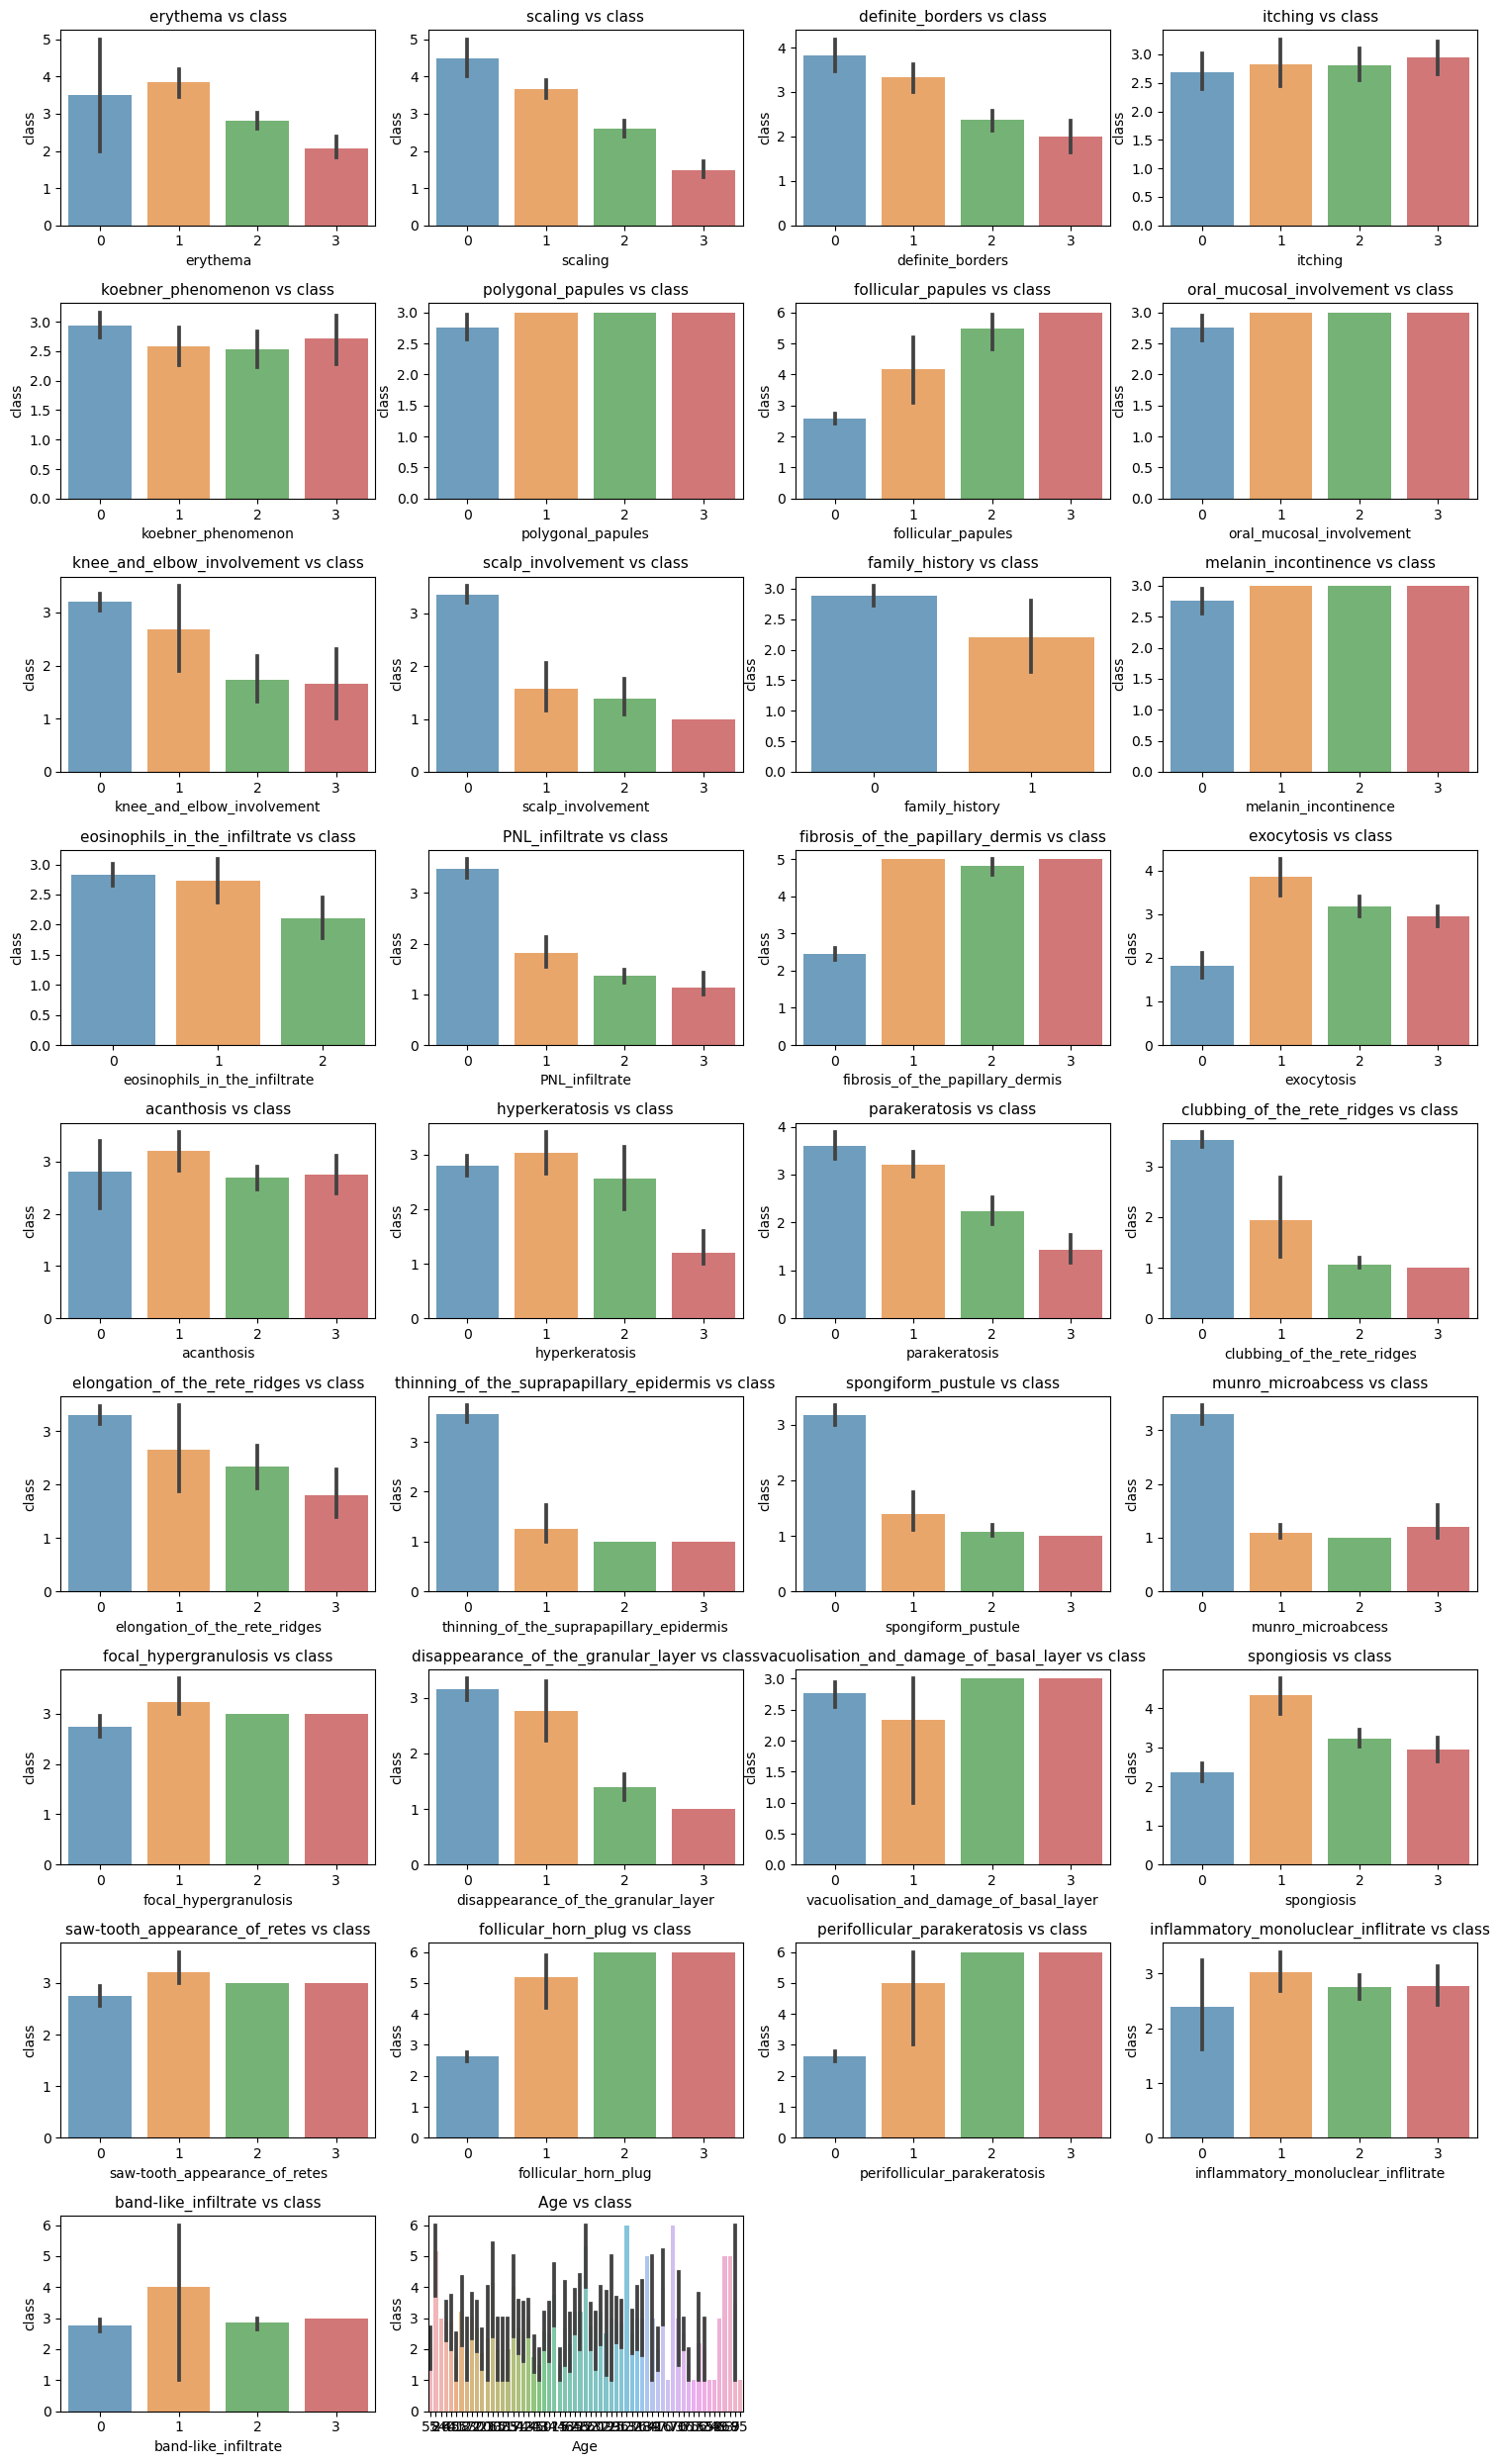

In [12]:
# Specify the target variable as a string
target_variable = 'class'  # Use the name of the target variable as a string
features_x = data.drop(columns=[target_variable])  # Drop the target variable

# Get the list of features excluding the target variable
features = features_x.columns.tolist()  # List of feature names

plt.figure(figsize=(15, 25))  # Increase height for better visibility

# Set the number of features and determine the layout
num_features = len(features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(features, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.barplot(data=data, x=feature, y=target_variable, alpha=0.7)#, color='blue'
    plt.title(f'{feature} vs {target_variable}', fontsize=11)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel(target_variable, fontsize=10)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show() # f show the graphs

#### **Insights**
**Class Imbalance:** Some classes appear to be more frequent than others for certain features. For example, class 1 seems to be dominant in features like "erythema," "scaling," and "definite borders."
Some classes appear to be more frequent than others for certain features. For example, class 1 seems to be dominant in features like "acanthosis," "hyperkeratosis," and "parakeratosis."
Some classes appear to be more frequent than others for certain features. For example, class 1 seems to be dominant in the feature "band-like_infiltrate."

**Feature Correlation with Class:** Some features might be more strongly associated with specific classes. For instance, "itching" seems to have a higher frequency in class 1 compared to other classes.
Some features might be more strongly associated with specific classes. For instance, "elongation of the rete ridges" seems to have a higher frequency in class 1 compared to other classes.
Some features might be more strongly associated with specific classes. For instance, "band-like_infiltrate" seems to have a higher frequency in class 1 compared to other classes.

**Feature-Class Relationships:** The plots can help identify features that are more characteristic of certain classes. For example, if a feature shows a higher frequency in a particular class, it might be a potential diagnostic marker for that class.
The plots can help identify features that are more characteristic of certain classes. For example, if a feature shows a higher frequency in a particular class, it might be a potential diagnostic marker for that class.
The plots can help identify features that are more characteristic of certain classes. For example, if a feature shows a higher frequency in a particular class, it might be a potential diagnostic marker for that class.

### **Multivariante Analysis**

In [15]:
sns.pairplot(data) # Multivarient Analysis

### **Final EDA Report**

**Distribution of Clinical Features:**

  * Most clinical features exhibit a right-skewed distribution, indicating that a majority of cases have lower values for these features.
Some features, such as "spongiosis" and "inflammatory mononuclear infiltrate," show a higher frequency of higher values, suggesting that these features are more prominent in certain classes of dermatological conditions.

**Relationship between Clinical Features and Classes:**

  * Several features, such as "acanthosis," "hyperkeratosis," and "parakeratosis," show a strong association with certain classes, suggesting that these features are characteristic of specific dermatological conditions.
  * Other features, like "elongation of the rete ridges" and "band-like infiltrate," also exhibit distinct patterns of distribution across different classes.
  * The "Age" feature appears to have a wide range of values, indicating that the dataset includes patients of various ages.

**Key Findings**

  * The dataset exhibits a diverse range of clinical features, suggesting a variety of dermatological conditions.
  * Certain clinical features are more strongly associated with specific classes of dermatological conditions, providing potential diagnostic markers.
  * The distribution of the "Age" feature suggests that the dataset includes a wide age range of patients.

## Feature Engineering

* **Objective:** Enhance the dataset with meaningful features that improve model accuracy.
* **Actions:**
  * Normalize or standardize features to ensure comparability.

### Data Preprocessing

* **Objective:** Prepare the data for modeling.
* **Actions:**
  * Split the dataset into training and testing sets (80/20 split).
  * Address class imbalance using techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling.

#### **Data Cleaning**

In [10]:
data.isnull().sum() # Identify missing values or inconsistencies.

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

#### **Insights**
  * There are no null values in column

* **Let's find the unique values in every columns**

In [11]:
# We create a function to find the unique values in every column of a pandas DataFrame
def find_unique_values(df):
    """Finds the unique values in each column of a pandas DataFrame.

    Args:
        df: The pandas DataFrame to analyze.

    Returns:
        A dictionary where the keys are the column names and the values are lists of unique values.
    """

    # Initialize an empty dictionary to store unique values for each column
    unique_values = {}

    # Loop through each column in the DataFrame
    for column in df.columns:
        # Get the unique values from the column, convert them to a list, and store in the dictionary
        unique_values[column] = df[column].unique().tolist()

    # Return the dictionary containing unique values for all columns
    return unique_values

In [12]:
find_unique_values(data) # give the dataframe to funtion for find unique values in each column

{'erythema': [2, 3, 1, 0],
 'scaling': [2, 3, 1, 0],
 'definite_borders': [0, 3, 2, 1],
 'itching': [3, 2, 0, 1],
 'koebner_phenomenon': [0, 1, 2, 3],
 'polygonal_papules': [0, 3, 2, 1],
 'follicular_papules': [0, 3, 1, 2],
 'oral_mucosal_involvement': [0, 3, 2, 1],
 'knee_and_elbow_involvement': [1, 0, 3, 2],
 'scalp_involvement': [0, 1, 2, 3],
 'family_history': [0, 1],
 'melanin_incontinence': [0, 1, 2, 3],
 'eosinophils_in_the_infiltrate': [0, 2, 1],
 'PNL_infiltrate': [0, 1, 3, 2],
 'fibrosis_of_the_papillary_dermis': [0, 3, 1, 2],
 'exocytosis': [3, 1, 0, 2],
 'acanthosis': [2, 3, 1, 0],
 'hyperkeratosis': [0, 2, 1, 3],
 'parakeratosis': [0, 2, 3, 1],
 'clubbing_of_the_rete_ridges': [0, 2, 1, 3],
 'elongation_of_the_rete_ridges': [0, 2, 3, 1],
 'thinning_of_the_suprapapillary_epidermis': [0, 2, 3, 1],
 'spongiform_pustule': [0, 2, 1, 3],
 'munro_microabcess': [0, 1, 2, 3],
 'focal_hypergranulosis': [0, 2, 3, 1],
 'disappearance_of_the_granular_layer': [0, 3, 2, 1],
 'vacuolisatio

* Here we can see the corrupted data like "0" and "?" in age column, and above we also see the Age columns has Object data type so we can handle this here

In [13]:
print(data.loc[(data.Age) == "?","Age"]) # here we can see corrupted values
print(data.loc[(data.Age) == "0","Age"]) # here we can see corrupted values

33     ?
34     ?
35     ?
36     ?
262    ?
263    ?
264    ?
265    ?
Name: Age, dtype: object
119    0
Name: Age, dtype: object


In [14]:
data.Age.mode() # Here we see the mode of age column

0    40
1    50
Name: Age, dtype: object

* here we handle the corrupted values with mode because the Age columns has discreate values.

In [15]:
data.loc[(data.Age) == "?","Age"] = 40 # here we handle the corrupted values with statistical mode
data.loc[(data.Age) == "0","Age"] = 40 # here we handle the corrupted values with statistical mode

In [16]:
data['Age'] = data['Age'].astype(int) # Here we change the corrupted datatype of Age 

In [17]:
data.Age.dtype # here we can see the datatype of age 

dtype('int32')

* **see the outliers in all features**

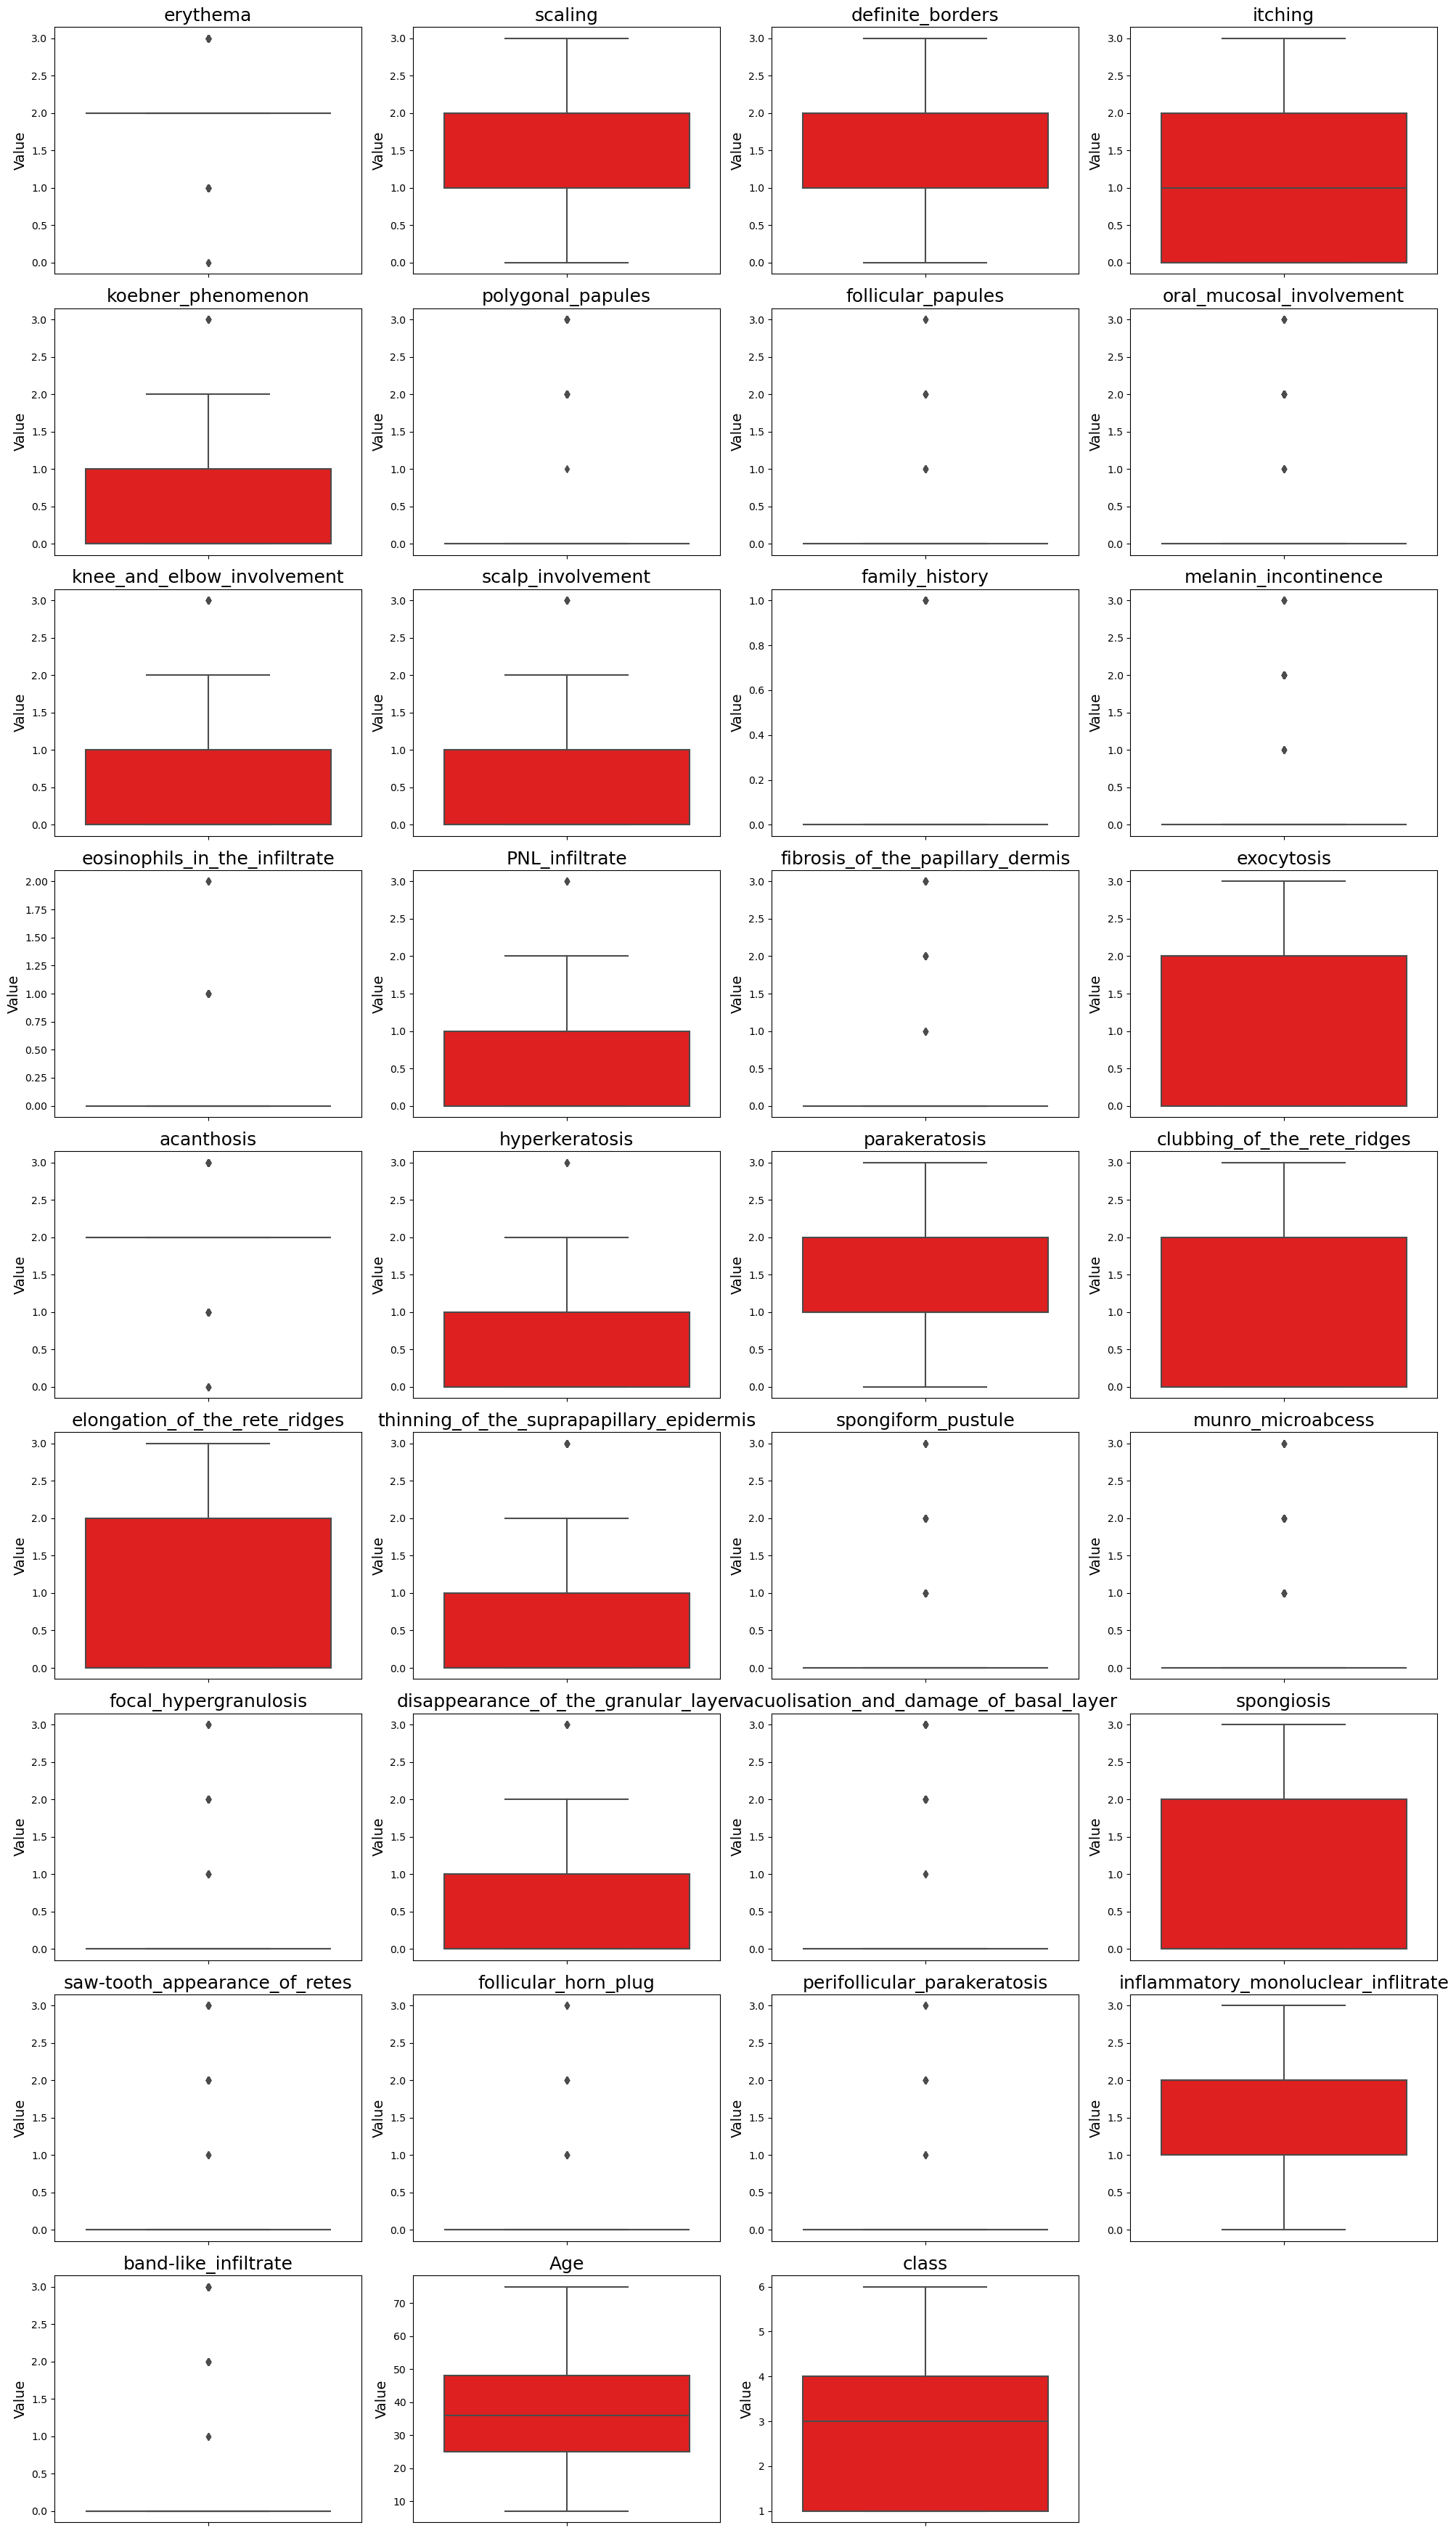

In [33]:
plt.figure(figsize=(20, 35))  # Adjust the figure size as needed

# Set the number of features and determine the layout
num_features = len(data.columns)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

for plot_num, feature in enumerate(data.columns, start=1):
    plt.subplot(num_rows, num_cols, plot_num)
    sns.boxplot(y=data[feature], color='red')  # Use 'y' parameter for vertical box plots
    plt.title(feature, fontsize=18)
    plt.ylabel('Value', fontsize=14)

# Show all plots at once
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show() # show the graph

#### **Insights**
Here we have outliers in below columns.
* **erythema**
*  **koebner_phenomenon**
*  **polygonal_papules**
*  **follicular_papules**
*  **oral_mucosal_involvement**
*  **knee_and_elbow_involvement**
*  **scalp_involvement**
*  **family_history**
*  **melanin_incontinence**
*  **eosinophils_in_the_infiltrate**
*  **PNL_infiltrate**
*  **fibrosis_of_the_papillary_dermis**
*  **acanthosis**
*  **hyperkeratosis**
*  **thinning_of_the_suprapapillary_epidermis**
*  **spongiform_pustule**
*  **munro_microabcess**
*  **focal_hypergranulosis**
*  **disappearance_of_the_granular_layer**
*  **vacuolisation_and_damage_of_basal_layer**
*  **saw-tooth_appearance_of_retes**
*  **follicular_horn_plug**
*  **perifollicular_parakeratosis**
*  **band-like_infiltrate**

#### Here we handle the ourliers of all column with mode because the all columns has discrete values.

**erythema**

In [18]:
# Correctly handle outliers in the 'erythema' column
data.loc[(data['erythema'] == 3) | (data['erythema'] == 1) | (data['erythema'] == 0), "erythema"] = 2

**koebner_phenomenon**

In [19]:
# Correctly handle outliers in the 'koebner_phenomenon' column
data.loc[(data['koebner_phenomenon'] == 3), "koebner_phenomenon"] = 0

**polygonal_papules**

In [20]:
# Correctly handle outliers in the 'polygonal_papules' column
data.loc[(data['polygonal_papules'] == 1) | (data['polygonal_papules'] == 2) | (data['polygonal_papules'] == 3), "polygonal_papules"] = 0

**follicular_papules**

In [21]:
# Correctly handle outliers in the 'follicular_papules' column
data.loc[(data['follicular_papules'] == 1) | (data['follicular_papules'] == 2) | (data['follicular_papules'] == 3), "follicular_papules"] = 0

**oral_mucosal_involvement**

In [22]:
# Correctly handle outliers in the 'oral_mucosal_involvement' column
data.loc[(data['oral_mucosal_involvement'] == 1) | (data['oral_mucosal_involvement'] == 2) | (data['oral_mucosal_involvement'] == 3), "oral_mucosal_involvement"] = 0

**knee_and_elbow_involvement**

In [23]:
# Correctly handle outliers in the 'knee_and_elbow_involvement' column
data.loc[(data['knee_and_elbow_involvement'] == 3), "knee_and_elbow_involvement"] = 0

**scalp_involvement**

In [24]:
# Correctly handle outliers in the 'scalp_involvement' column
data.loc[(data['scalp_involvement'] == 3), "scalp_involvement"] = 0

**family_history**

In [25]:
# Correctly handle outliers in the 'family_history' column
data.loc[(data['family_history'] == 1), "family_history"] = 0

**melanin_incontinence**

In [26]:
# Correctly handle outliers in the 'melanin_incontinence' column
data.loc[(data['melanin_incontinence'] == 1) | (data['melanin_incontinence'] == 2) | (data['melanin_incontinence'] == 3), "melanin_incontinence"] = 0

**eosinophils_in_the_infiltrate**

In [27]:
# Correctly handle outliers in the 'eosinophils_in_the_infiltrate' column
data.loc[(data['eosinophils_in_the_infiltrate'] == 1) | (data['eosinophils_in_the_infiltrate'] == 2), "eosinophils_in_the_infiltrate"] = 0

**PNL_infiltrate**

In [28]:
# Correctly handle outliers in the 'PNL_infiltrate' column
data.loc[(data['PNL_infiltrate'] == 3), "PNL_infiltrate"] = 0

**fibrosis_of_the_papillary_dermis**

In [29]:
# Correctly handle outliers in the 'fibrosis_of_the_papillary_dermis' column
data.loc[(data['fibrosis_of_the_papillary_dermis'] == 1) | (data['fibrosis_of_the_papillary_dermis'] == 2) | (data['fibrosis_of_the_papillary_dermis'] == 3), "fibrosis_of_the_papillary_dermis"] = 0

**acanthosis**

In [30]:
# Correctly handle outliers in the 'acanthosis' column
data.loc[(data['acanthosis'] == 0) | (data['acanthosis'] == 1) | (data['acanthosis'] == 3), "acanthosis"] = 2

**hyperkeratosis**

In [31]:
# Correctly handle outliers in the 'hyperkeratosis' column
data.loc[(data['hyperkeratosis'] == 3), "hyperkeratosis"] = 0

**thinning_of_the_suprapapillary_epidermis**

In [32]:
# Correctly handle outliers in the 'thinning_of_the_suprapapillary_epidermis' column
data.loc[(data['thinning_of_the_suprapapillary_epidermis'] == 3), "thinning_of_the_suprapapillary_epidermis"] = 0

**spongiform_pustule**

In [33]:
# Correctly handle outliers in the 'spongiform_pustule' column
data.loc[(data['spongiform_pustule'] == 1) | (data['spongiform_pustule'] == 2) | (data['spongiform_pustule'] == 3), "spongiform_pustule"] = 0

**munro_microabcess**

In [34]:
# Correctly handle outliers in the 'munro_microabcess' column
data.loc[(data['munro_microabcess'] == 1) | (data['munro_microabcess'] == 2) | (data['munro_microabcess'] == 3), "munro_microabcess"] = 0

**focal_hypergranulosis**

In [35]:
# Correctly handle outliers in the 'focal_hypergranulosis' column
data.loc[(data['focal_hypergranulosis'] == 1) | (data['focal_hypergranulosis'] == 2) | (data['focal_hypergranulosis'] == 3), "focal_hypergranulosis"] = 0

**disappearance_of_the_granular_layer**

In [36]:
# Correctly handle outliers in the 'disappearance_of_the_granular_layer' column
data.loc[(data['disappearance_of_the_granular_layer'] == 3), "disappearance_of_the_granular_layer"] = 0

**vacuolisation_and_damage_of_basal_layer**

In [37]:
# Correctly handle outliers in the 'vacuolisation_and_damage_of_basal_layer' column
data.loc[(data['vacuolisation_and_damage_of_basal_layer'] == 1) | (data['vacuolisation_and_damage_of_basal_layer'] == 2) |(data['vacuolisation_and_damage_of_basal_layer'] == 3), "vacuolisation_and_damage_of_basal_layer"] = 0

**saw-tooth_appearance_of_retes**

In [38]:
# Correctly handle outliers in the 'saw-tooth_appearance_of_retes' column
data.loc[(data['saw-tooth_appearance_of_retes'] == 1) | (data['saw-tooth_appearance_of_retes'] == 2) | (data['saw-tooth_appearance_of_retes'] == 3), "saw-tooth_appearance_of_retes"] = 0

**follicular_horn_plug**

In [39]:
# Correctly handle outliers in the 'follicular_horn_plug' column
data.loc[(data['follicular_horn_plug'] == 1) | (data['follicular_horn_plug'] == 2) | (data['follicular_horn_plug'] == 3), "follicular_horn_plug"] = 0

**perifollicular_parakeratosis**

In [40]:
# Correctly handle outliers in the 'perifollicular_parakeratosis' column
data.loc[(data['perifollicular_parakeratosis'] == 1) | (data['perifollicular_parakeratosis'] == 2) | (data['perifollicular_parakeratosis'] == 3), "perifollicular_parakeratosis"] = 0

**band-like_infiltrate**

In [41]:
# Correctly handle outliers in the 'band-like_infiltrate' column
data.loc[(data['band-like_infiltrate'] == 1) | (data['band-like_infiltrate'] == 2) | (data['band-like_infiltrate'] == 3), "band-like_infiltrate"] = 0

**Here we handled all outliers from all columns**

## Feature Selection
* **Identify Important Features:**
  * Use correlation analysis and feature importance metrics .

In [42]:
data.corr() # Check the correlation of all features

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scaling,NaN,1.000000,0.357987,-0.084197,-0.071456,NaN,NaN,NaN,0.262906,0.270328,NaN,NaN,NaN,0.271671,NaN,-0.110809,NaN,-0.019632,0.296752,0.320740,0.139073,0.277891,NaN,NaN,NaN,0.195252,NaN,0.012151,NaN,NaN,NaN,-0.010977,NaN,0.003498,-0.468688
definite_borders,NaN,0.357987,1.000000,-0.062564,0.184789,NaN,NaN,NaN,0.192908,0.204542,NaN,NaN,NaN,-0.005296,NaN,-0.205391,NaN,0.018282,0.361213,0.387205,0.201702,0.255701,NaN,NaN,NaN,0.290064,NaN,-0.255536,NaN,NaN,NaN,0.111882,NaN,0.127056,-0.391974
itching,NaN,-0.084197,-0.062564,1.000000,0.139461,NaN,NaN,NaN,-0.237317,-0.172766,NaN,NaN,NaN,-0.085967,NaN,0.214822,NaN,-0.021178,-0.075568,-0.232224,-0.124058,-0.159758,NaN,NaN,NaN,-0.153239,NaN,0.017514,NaN,NaN,NaN,0.062781,NaN,0.047802,0.054772
koebner_phenomenon,NaN,-0.071456,0.184789,0.139461,1.000000,NaN,NaN,NaN,-0.071391,-0.020385,NaN,NaN,NaN,-0.105041,NaN,0.064919,NaN,0.034000,-0.030506,0.041453,-0.116539,0.036485,NaN,NaN,NaN,0.040757,NaN,-0.045035,NaN,NaN,NaN,0.034867,NaN,0.092237,-0.102029
polygonal_papules,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
follicular_papules,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oral_mucosal_involvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knee_and_elbow_involvement,NaN,0.262906,0.192908,-0.237317,-0.071391,NaN,NaN,NaN,1.000000,0.492671,NaN,NaN,NaN,0.199232,NaN,-0.429138,NaN,0.198078,0.359022,0.589122,0.400907,0.475740,NaN,NaN,NaN,0.294355,NaN,-0.319538,NaN,NaN,NaN,-0.044551,NaN,-0.112012,-0.311663
scalp_involvement,NaN,0.270328,0.204542,-0.172766,-0.020385,NaN,NaN,NaN,0.492671,1.000000,NaN,NaN,NaN,0.287504,NaN,-0.431402,NaN,0.110841,0.452505,0.624113,0.469963,0.523741,NaN,NaN,NaN,0.370466,NaN,-0.365836,NaN,NaN,NaN,0.010278,NaN,0.105063,-0.453091


<Axes: >

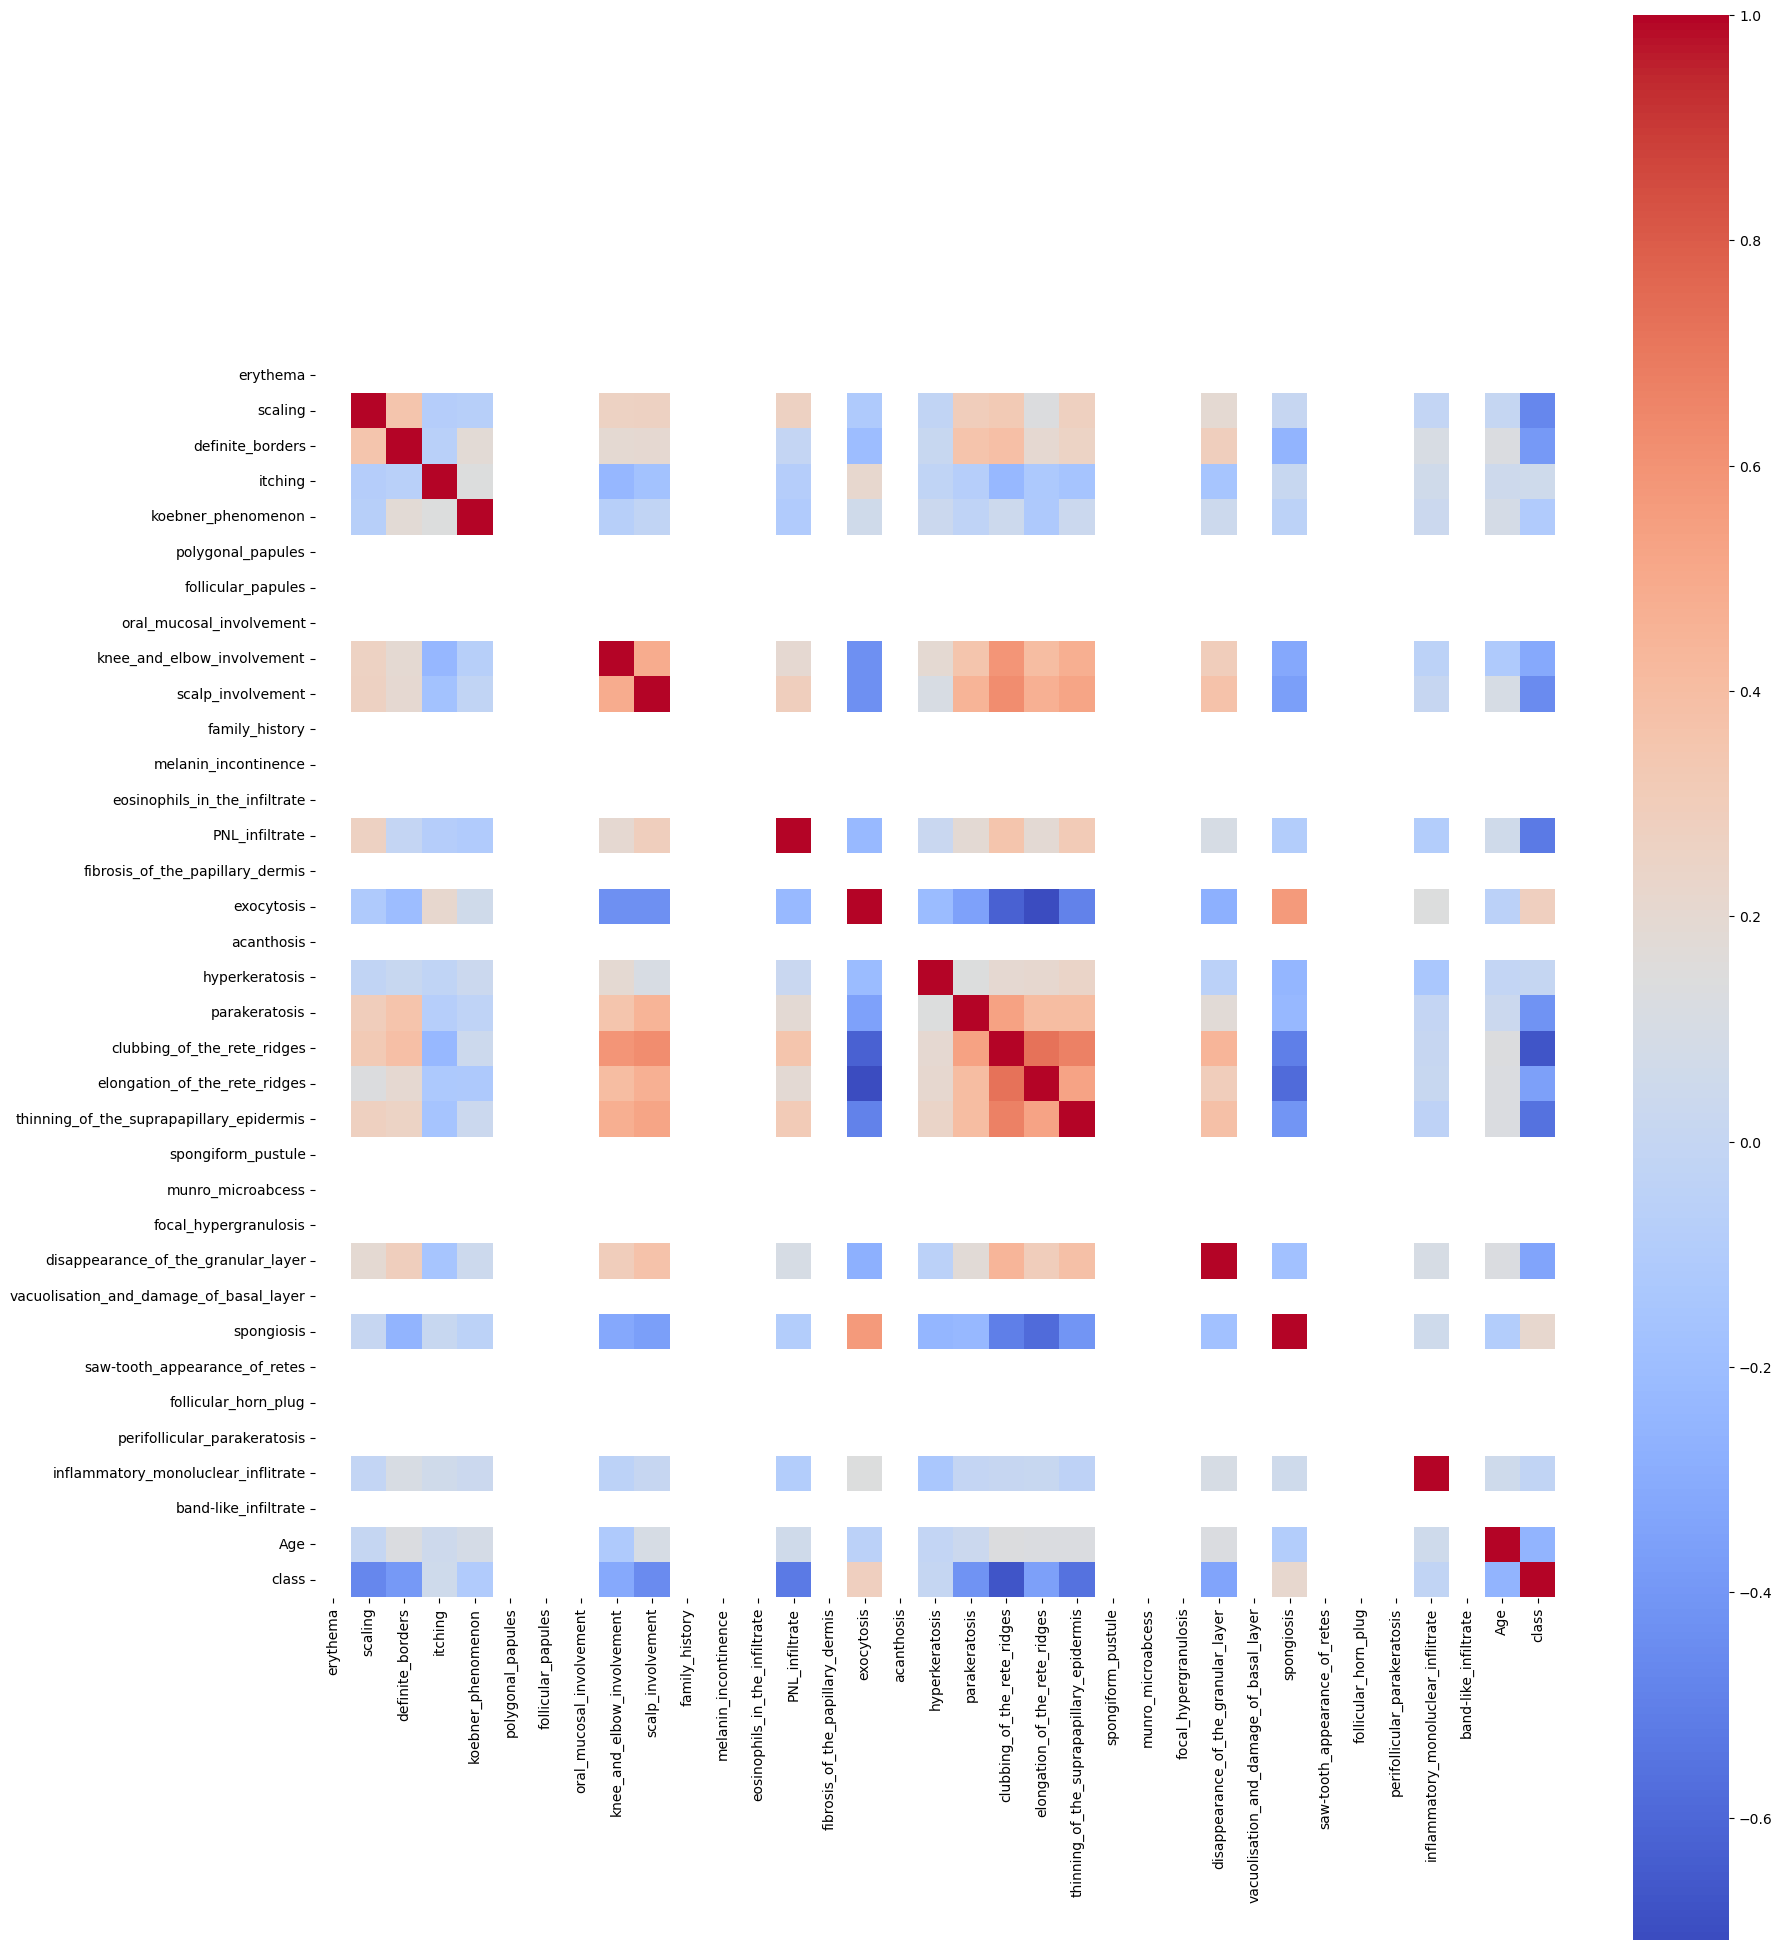

In [43]:
# Here is heatmap of correlation of all features
plt.figure(figsize=(20, 25))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True) # ploting the heat map for checking correlation

**Summary**
  
  **correlated columns:** erythema, scaling, definite_borders, itching, koebner_phenomenon, knee_and_elbow_involvement, scalp_involvement, Age.
  
  **Nan or low or high correlated columns:** polygonal_papules, follicular_papules, oral_mucosal_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate.

* Here we hard to identify which columns are impotant or not and we have dermatological data so keep it all columns.

In [48]:
# df = data.drop(["polygonal_papules", "follicular_papules", "oral_mucosal_involvement",
#                 "family_history", "melanin_incontinence", "eosinophils_in_the_infiltrate",
#                 "PNL_infiltrate", "fibrosis_of_the_papillary_dermis", "exocytosis", "acanthosis",
#                 "hyperkeratosis", "parakeratosis", "clubbing_of_the_rete_ridges", "elongation_of_the_rete_ridges",
#                 "thinning_of_the_suprapapillary_epidermis", "spongiform_pustule", "munro_microabcess", "focal_hypergranulosis",
#                 "disappearance_of_the_granular_layer", "vacuolisation_and_damage_of_basal_layer", "spongiosis",
#                 "saw-tooth_appearance_of_retes", "follicular_horn_plug","perifollicular_parakeratosis",
#                 "inflammatory_monoluclear_inflitrate", "band-like_infiltrate"],axis=1)

## Model Selection

* **Objective:** Choose the most appropriate predictive models.
* **Actions:**
  * Test various algorithms (e.g., Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machines).
  * Evaluate models based on metrics.

In [51]:
data["class"].value_counts() # see the target variable

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [54]:
X = data.drop(["class"],axis=1) # define the X
y = data["class"] # define the y

## Modeling
* **Train-Test Split:**
  * Split the dataset into training and testing sets (80/20 split).

In [55]:
from sklearn.model_selection import train_test_split  # importing train_test_split for spliting the data into training and testing

In [56]:
# Here we split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

## Model Creation and Model Evaluation

### Model Training and Tuning

* **Objective:** Optimize model performance, and Assess the final model's performance on unseen data.
* **Actions:**
  * Use cross-validation to validate model performance.
  * Fine-tune hyperparameters using techniques such as Grid Search or Random Search.
  * Evaluate the model using the train and test dataset.

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # importing the metrics of classfication

### **Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression # importing the Logistic regression Algorithm

In [63]:
LR_model = LogisticRegression() # save the model

In [64]:
LR_model.fit(X_train,y_train) # Train the model

LogisticRegression()

In [65]:
LR_train_predict = LR_model.predict(X_train) # Prediction for training
LR_test_predict = LR_model.predict(X_test) # Prediction for testing

In [66]:
LR_training_accuracy = accuracy_score(y_train,LR_train_predict) # accuracy for training
LR_testing_accuracy = accuracy_score(y_test,LR_test_predict) # accuracy for testing

In [67]:
print("Training accuracy",LR_training_accuracy) # See the Training accuracy
print("Testing accuracy",LR_testing_accuracy)# See the Testing accuracy

Training accuracy 0.9657534246575342
Testing accuracy 0.9324324324324325


#### **Hyperparameter tuning for Logistic Regression**

In [68]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [69]:
# Define the hyperparameter grid
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],      # Optimization algorithm
    'penalty': ['l2', 'none'],             # Regularization type
}

# Create the GridSearchCV object
grid_search_LR = GridSearchCV(LR_model, param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_LR.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_LR.best_params_)

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [70]:
# Best model
LR_HPT_model = grid_search_LR.best_estimator_

In [71]:
LR_HPT_train_predict = LR_HPT_model.predict(X_train)  # Prediction for training
LR_HPT_test_predict = LR_HPT_model.predict(X_test)  # Prediction for testing

In [72]:
# Calculate accuracy for training and testing
LR_HPT_training_accuracy = accuracy_score(y_train, LR_HPT_train_predict)  # Accuracy for training
LR_HPT_testing_accuracy = accuracy_score(y_test, LR_HPT_test_predict)  # Accuracy for testing

In [73]:
print("Training Accuracy:", LR_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", LR_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.9623287671232876
Testing Accuracy: 0.9594594594594594


### **Support Vector Machine (SVM)**

In [74]:
from sklearn.svm import SVC # Importing the SVM Algorithm

In [75]:
SVM_model = SVC() #kernel="rbf",gamma="auto",C=1 # save the model 

In [76]:
SVM_model.fit(X_train,y_train) # Train the model

SVC()

In [77]:
SVM_train_predict = SVM_model.predict(X_train) # Prediction for training
SVM_test_predict = SVM_model.predict(X_test) # Prediction for testing

In [78]:
SVM_training_accuracy = accuracy_score(y_train,SVM_train_predict) # accuracy for training
SVM_testing_accuracy = accuracy_score(y_test,SVM_test_predict) # accuracy for testing

In [79]:
print("Training Accuracy:", SVM_training_accuracy) # See the training accuracy
print("Testing Accuracy:", SVM_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.5513698630136986
Testing Accuracy: 0.5


#### **Hyperparameter tuning For SVM**

In [80]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [81]:
# Define the parameter grid for hyperparameter tuning
param_grid_SVM = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create the GridSearchCV object
grid_search_SVM = GridSearchCV(
    SVM_model,
    param_grid_SVM,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_SVM.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_SVM.best_params_)
print("Best Score:", grid_search_SVM.best_score_)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9147866744593804


In [82]:
# Make predictions with the best estimator
SVM_HPT_model = grid_search_SVM.best_estimator_

In [83]:
SVM_HPT_train_predict = SVM_HPT_model.predict(X_train)  # Prediction for training
SVM_HPT_test_predict = SVM_HPT_model.predict(X_test)  # Prediction for testing

In [84]:
# Calculate accuracy for training and testing
SVM_HPT_training_accuracy = accuracy_score(y_train, SVM_HPT_train_predict)  # Accuracy for training
SVM_HPT_testing_accuracy = accuracy_score(y_test, SVM_HPT_test_predict)  # Accuracy for testing

In [85]:
print("Training Accuracy:", SVM_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", SVM_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 0.9691780821917808
Testing Accuracy: 0.8783783783783784


### **Decision Tree**

In [86]:
from sklearn.tree import DecisionTreeClassifier # importing the Decision Tree Algorithm

In [87]:
DT_model = DecisionTreeClassifier() # save the model

In [88]:
DT_model.fit(X_train,y_train) # Train the model

DecisionTreeClassifier()

In [89]:
DT_train_predict = DT_model.predict(X_train) # Prediction for training
DT_test_predict = DT_model.predict(X_test) # Prediction for testing

In [90]:
DT_training_accuracy = accuracy_score(y_train,DT_train_predict) # accuracy for training
DT_testing_accuracy = accuracy_score(y_test,DT_test_predict) # accuracy for testing

In [91]:
print("Training Accuracy:", DT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", DT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.8783783783783784


#### **Hyperparameter tuning For Decision Tree**

In [92]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [93]:
# Define the hyperparameter grid
param_grid_DT = {
    'criterion': ['gini', 'entropy'],          # Split quality measure
    'max_depth': [None, 10, 20, 30, 40, 50],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],         # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
}

# Create the GridSearchCV object
grid_search_DT = GridSearchCV(DT_model, param_grid_DT, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_DT.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_DT.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [94]:
# Best model
DT_HPT_model = grid_search_DT.best_estimator_

In [95]:
DT_HPT_train_predict = DT_HPT_model.predict(X_train)  # Prediction for training
DT_HPT_test_predict = DT_HPT_model.predict(X_test)  # Prediction for testing

In [96]:
# Calculate accuracy for training and testing
DT_HPT_training_accuracy = accuracy_score(y_train, DT_HPT_train_predict)  # Accuracy for training
DT_HPT_testing_accuracy = accuracy_score(y_test, DT_HPT_test_predict)  # Accuracy for testing

In [97]:
print("Training Accuracy:", DT_HPT_training_accuracy) # See the training accuracy
print("Testing Accuracy:", DT_HPT_testing_accuracy) # See the Testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.8243243243243243


### **Random Forest**

In [100]:
from sklearn.ensemble import RandomForestClassifier # importing the Random Forest Algorithm

In [101]:
RF_model = RandomForestClassifier() # save the model

In [102]:
RF_model.fit(X_train,y_train) # Train the model

RandomForestClassifier()

In [103]:
RF_train_predict = RF_model.predict(X_train) # Prediction for training
RF_test_predict = RF_model.predict(X_test) # Prediction for testing

In [104]:
RF_training_accuracy = accuracy_score(y_train,RF_train_predict) # accuracy for training
RF_testing_accuracy = accuracy_score(y_test,RF_test_predict) # accuracy for testing

In [105]:
print("Training Accuracy:", RF_training_accuracy) # See the training accuracy
print("Testing Accuracy:", RF_testing_accuracy) # See the Testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9324324324324325


#### **Hyperparameter tuning For Random Forest**

In [106]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [107]:
# Define the parameter grid for hyperparameter tuning
param_grid_RF = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search_RF = GridSearchCV(
    RF_model,
    param_grid_RF,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_RF.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_RF.best_params_)
print("Best Score:", grid_search_RF.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.9382817066043249


In [108]:
# Make predictions with the best estimator
RF_HPT_model = grid_search_RF.best_estimator_

In [109]:
RF_HPT_train_predict = RF_HPT_model.predict(X_train)  # Prediction for training
RF_HPT_test_predict = RF_HPT_model.predict(X_test)  # Prediction for testing

In [110]:
# Calculate accuracy for training and testing
RF_HPT_training_accuracy = accuracy_score(y_train, RF_HPT_train_predict)  # Accuracy for training
RF_HPT_testing_accuracy = accuracy_score(y_test, RF_HPT_test_predict)  # Accuracy for testing

In [111]:
print("Training Accuracy:", RF_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", RF_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9324324324324325


### **K-Nearest Neighbors (KNN)**

In [112]:
from sklearn.neighbors import KNeighborsClassifier # importing the KKN Algorithm

In [113]:
KNN_model = KNeighborsClassifier() # save the model

In [114]:
KNN_model.fit(X_train,y_train) # Train the model

KNeighborsClassifier()

In [115]:
KNN_train_predict = KNN_model.predict(X_train) # Prediction for training
KNN_test_predict = KNN_model.predict(X_test) # Prediction for testing

In [116]:
KNN_training_accuracy = accuracy_score(y_train,KNN_train_predict) # accuracy for training
KNN_testing_accuracy = accuracy_score(y_test,KNN_test_predict) # accuracy for testing

In [117]:
print("Training Accuracy:", KNN_training_accuracy) # see the training accuracy
print("Testing Accuracy:", KNN_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.863013698630137
Testing Accuracy: 0.7162162162162162


#### **Hyperparameter tuning of K-Nearest Neighbors (KNN)**

In [118]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [119]:
# Define the parameter grid for hyperparameter tuning
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Different values for n_neighbors
    'weights': ['uniform', 'distance'],  # Weighting functions
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Create the GridSearchCV object
grid_search_KNN = GridSearchCV(
    KNN_model,
    param_grid_KNN,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_KNN.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_KNN.best_params_)
print("Best Score:", grid_search_KNN.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.8357101110461717


In [120]:
# Make predictions with the best estimator
KNN_HPT_model = grid_search_KNN.best_estimator_

In [121]:
KNN_HPT_train_predict = KNN_HPT_model.predict(X_train)  # Prediction for training
KNN_HPT_test_predict = KNN_HPT_model.predict(X_test)  # Prediction for testing

In [122]:
# Calculate accuracy for training and testing
KNN_HPT_training_accuracy = accuracy_score(y_train, KNN_HPT_train_predict)  # Accuracy for training
KNN_HPT_testing_accuracy = accuracy_score(y_test, KNN_HPT_test_predict)  # Accuracy for testing

In [123]:
print("Training Accuracy:", KNN_HPT_training_accuracy)
print("Testing Accuracy:", KNN_HPT_testing_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.7837837837837838


### **Naive Bayes**

In [124]:
from sklearn.naive_bayes import GaussianNB # importing the naive bayes Algorithm

In [125]:
naive_bayes_model = GaussianNB() # save the model

In [126]:
naive_bayes_model.fit(X_train,y_train) # Train the model

GaussianNB()

In [127]:
naive_bayes_model_train_predict = naive_bayes_model.predict(X_train) # Prediction for training
naive_bayes_model_test_predict = naive_bayes_model.predict(X_test) # Prediction for testing

In [128]:
naive_bayes_training_accuracy = accuracy_score(y_train, naive_bayes_model_train_predict) # accuracy for training
naive_bayes_testing_accuracy = accuracy_score(y_test, naive_bayes_model_test_predict) # accuracy for testing

In [129]:
print("Training Accuracy:", naive_bayes_training_accuracy)
print("Testing Accuracy:", naive_bayes_testing_accuracy)

Training Accuracy: 0.7842465753424658
Testing Accuracy: 0.7837837837837838


#### **Hyperparameter Tuning of Naive Bayes**

In [130]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [131]:
# Define the parameter grid for hyperparameter tuning
param_grid_naive_bayes = {
    'var_smoothing': np.logspace(0, -9, num=100)  # A range of values for var_smoothing
}

# Create the GridSearchCV object
naive_bayes_grid_search = GridSearchCV(
    naive_bayes_model,
    param_grid_naive_bayes,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
naive_bayes_grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", naive_bayes_grid_search.best_params_)
print("Best Score:", naive_bayes_grid_search.best_score_)

Best Parameters: {'var_smoothing': 0.0005336699231206307}
Best Score: 0.9350087668030392


In [132]:
# Make predictions with the best estimator
naive_bayes_HPT_model = naive_bayes_grid_search.best_estimator_

In [133]:
naive_bayes_HPT_train_predict = naive_bayes_HPT_model.predict(X_train)  # Prediction for training
naive_bayes_HPT_test_predict = naive_bayes_HPT_model.predict(X_test)  # Prediction for testing

In [134]:
# Calculate accuracy for training and testing
naive_bayes_HPT_training_accuracy = accuracy_score(y_train, naive_bayes_HPT_train_predict)  # Accuracy for training
naive_bayes_HPT_testing_accuracy = accuracy_score(y_test, naive_bayes_HPT_test_predict)  # Accuracy for testing

In [135]:
print("Training Accuracy:", naive_bayes_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", naive_bayes_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9554794520547946
Testing Accuracy: 0.9594594594594594


### **Gradient Boosting**

In [136]:
from sklearn.ensemble import GradientBoostingClassifier # Importing Gradient Boosting Algorithm

In [137]:
GB_model = GradientBoostingClassifier() # save the model

In [138]:
GB_model.fit(X_train,y_train) # Train the model

GradientBoostingClassifier()

In [139]:
GB_train_predict = GB_model.predict(X_train) # Prediction for training
GB_test_predict = GB_model.predict(X_test) # Prediction for testing

In [140]:
GB_training_accuracy = accuracy_score(y_train,GB_train_predict) # accuracy for training
GB_testing_accuracy = accuracy_score(y_test,GB_test_predict) # accuracy for testing

In [141]:
print("Training Accuracy:", GB_training_accuracy) # see the training accuracy
print("Testing Accuracy:", GB_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9054054054054054


#### **Hyperparameter Tuning for Gradient Boosting**

In [142]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [143]:
# Define the hyperparameter grid
param_grid_GB = {
    'n_estimators': [50, 100, 200],            # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage used in updates
    'max_depth': [3, 5, 7],                    # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],             # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0]                    # Fraction of samples to be used for fitting the individual base learners
}

# Create the GridSearchCV object
grid_search_GB = GridSearchCV(GB_model, param_grid_GB, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_GB.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_GB.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 0.8}


In [144]:
# Best model
GB_HPT_model = grid_search_GB.best_estimator_

In [145]:
GB_HPT_train_predict = GB_HPT_model.predict(X_train)  # Prediction for training
GB_HPT_test_predict = GB_HPT_model.predict(X_test)  # Prediction for testing

In [146]:
# Calculate accuracy for training and testing
GB_HPT_training_accuracy = accuracy_score(y_train, GB_HPT_train_predict)  # Accuracy for training
GB_HPT_testing_accuracy = accuracy_score(y_test, GB_HPT_test_predict)  # Accuracy for testing

In [147]:
print("Training Accuracy:", GB_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", GB_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9054054054054054


### **Ada Boosting**

In [148]:
from sklearn.ensemble import AdaBoostClassifier # Importing Ada Boosting Algorithm

In [149]:
AD_model = AdaBoostClassifier() # save the model

In [150]:
AD_model.fit(X_train,y_train) # Train the model

AdaBoostClassifier()

In [151]:
AD_train_predict = AD_model.predict(X_train) # Prediction for training
AD_test_predict = AD_model.predict(X_test) # Prediction for testing

In [152]:
AD_training_accuracy = accuracy_score(y_train,AD_train_predict) # accuracy for training
AD_testing_accuracy = accuracy_score(y_test,AD_test_predict) # accuracy for testing

In [153]:
print("Training Accuracy:", AD_training_accuracy) # see the training accuracy
print("Testing Accuracy:", AD_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.541095890410959
Testing Accuracy: 0.5135135135135135


In [154]:
#### **Hyperparameter Tuning for Ada Boosting**

In [155]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [156]:
# Define the hyperparameter grid
param_grid_AD = {
    'n_estimators': [50, 100, 200],            # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],         # Weight applied to each classifier
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1)]  # Base estimator
}

# Create the GridSearchCV object
grid_search_AD = GridSearchCV(AD_model, param_grid_AD, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_AD.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_AD.best_params_)

Best Hyperparameters: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50}


In [157]:
# Best model
AD_HPT_model = grid_search_AD.best_estimator_

In [158]:
AD_HPT_train_predict = AD_HPT_model.predict(X_train)  # Prediction for training
AD_HPT_test_predict = AD_HPT_model.predict(X_test)  # Prediction for testing

In [159]:
# Calculate accuracy for training and testing
AD_HPT_training_accuracy = accuracy_score(y_train, AD_HPT_train_predict)  # Accuracy for training
AD_HPT_testing_accuracy = accuracy_score(y_test, AD_HPT_test_predict)  # Accuracy for testing

In [160]:
print("Training Accuracy:", AD_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", AD_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.8184931506849316
Testing Accuracy: 0.7837837837837838


### **Xtreme Gradient Boosting**

In [161]:
from xgboost import XGBClassifier # Importing Xtreme Gradient Boosting Algorithm

In [162]:
XGB_model = XGBClassifier() # save the model

In [203]:
# Print original unique classes
print("Original unique classes in y_train:", np.unique(y_train))

Original unique classes in y_train: [1 2 3 4 5 6]


In [213]:
# Relabel classes from [1, 2, 3, 4, 5, 6] to [0, 1, 2, 3, 4, 5]
y_train_relabelled = y_train - 1
y_test_relabelled = y_test - 1

In [226]:
# Print relabelled unique classes
print("Relabelled unique classes in y_train:", np.unique(y_train_relabelled))
# Print relabelled unique classes
print("Relabelled unique classes in y_test:", np.unique(y_test_relabelled))

Relabelled unique classes in y_train: [0 1 2 3 4 5]
Relabelled unique classes in y_test: [0 1 2 3 4 5]


In [215]:
XGB_model.fit(X_train, y_train_relabelled)  # Fit with relabelled target

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [216]:
XGB_train_predict = XGB_model.predict(X_train) # Prediction for training
XGB_test_predict = XGB_model.predict(X_test) # Prediction for testing

In [217]:
XGB_training_accuracy = accuracy_score(y_train_relabelled, XGB_train_predict) # accuracy for training
XGB_testing_accuracy = accuracy_score(y_test_relabelled, XGB_test_predict) # accuracy for testing

In [218]:
print("Training Accuracy:", XGB_training_accuracy) # see the training accuracy
print("Testing Accuracy:", XGB_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9054054054054054


#### **Hyperparameter Tuning for Xtreme Gradient Boosting**

In [219]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [221]:
# Define the hyperparameter grid
param_grid_XGB = {
    'n_estimators': [50, 100, 200],            # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'max_depth': [3, 5, 7],                    # Maximum tree depth
    'min_child_weight': [1, 2, 3],             # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.8, 1.0],                   # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 1.0],            # Fraction of features used for fitting the trees
}

# Create the GridSearchCV object
grid_search_XGB = GridSearchCV(XGB_model, param_grid_XGB, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_XGB.fit(X_train, y_train_relabelled)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_XGB.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


In [222]:
# Best model
XGB_HPT_model = grid_search_XGB.best_estimator_

In [223]:
XGB_HPT_train_predict = XGB_HPT_model.predict(X_train)  # Prediction for training
XGB_HPT_test_predict = XGB_HPT_model.predict(X_test)  # Prediction for testing

In [224]:
# Calculate accuracy for training and testing
XGB_HPT_training_accuracy = accuracy_score(y_train_relabelled, XGB_HPT_train_predict)  # Accuracy for training
XGB_HPT_testing_accuracy = accuracy_score(y_test_relabelled, XGB_HPT_test_predict)  # Accuracy for testing

In [225]:
print("Training Accuracy:", XGB_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", XGB_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.918918918918919


### **Bagging Algorithm**

In [164]:
from sklearn.ensemble import BaggingClassifier # importing Bagging Algorithm

In [165]:
BG_model = BaggingClassifier(base_estimator=XGBClassifier(), n_estimators=100) # save the model

In [166]:
BG_model.fit(X_train,y_train) # Train the model

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                  n_estimators=100)

In [167]:
BG_train_predict = BG_model.predict(X_train) # Prediction for training
BG_test_predict = BG_model.predict(X_test) # Prediction for testing

In [171]:
BG_training_accuracy = accuracy_score(y_train,BG_train_predict) # accuracy for training
BG_testing_accuracy = accuracy_score(y_test,BG_test_predict) # accuracy for testing

In [172]:
print("Training Accuracy:", BG_training_accuracy) # see the training accuracy
print("Testing Accuracy:", BG_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9054054054054054


#### **Hyperparameter Tuning for Bagging Algorithm**

In [173]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [174]:
# Define the hyperparameter grid
param_grid_BG = {
    'n_estimators': [50, 100, 200],              # Number of base estimators in the ensemble
    'base_estimator__n_estimators': [50, 100],  # Number of boosting rounds for XGBClassifier
    'base_estimator__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'base_estimator__max_depth': [3, 5, 7],      # Maximum tree depth
    'base_estimator__subsample': [0.8, 1.0],     # Fraction of samples used for fitting the base learners
}

# Create the GridSearchCV object
grid_search_BG = GridSearchCV(BG_model, param_grid_BG, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_BG.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search_BG.best_params_)

Best Hyperparameters: {'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 3, 'base_estimator__n_estimators': 100, 'base_estimator__subsample': 0.8, 'n_estimators': 50}


In [175]:
# Best model
BG_HPT_model = grid_search_BG.best_estimator_

In [176]:
BG_HPT_train_predict = BG_HPT_model.predict(X_train)  # Prediction for training
BG_HPT_test_predict = BG_HPT_model.predict(X_test)  # Prediction for testing

In [177]:
# Calculate accuracy for training and testing
BG_HPT_training_accuracy = accuracy_score(y_train, BG_HPT_train_predict)  # Accuracy for training
BG_HPT_testing_accuracy = accuracy_score(y_test, BG_HPT_test_predict)  # Accuracy for testing

In [178]:
print("Training Accuracy:", BG_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", BG_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9965753424657534
Testing Accuracy: 0.9324324324324325


### **Artificial Neural Network (ANN)**

In [179]:
from sklearn.neural_network import MLPClassifier # importing Artificial Neural Network (ANN) algorithm

In [180]:
MLP_model = MLPClassifier() # save the model

In [181]:
MLP_model.fit(X_train,y_train) # Train the model

MLPClassifier()

In [182]:
MLP_train_predict = MLP_model.predict(X_train) # Prediction for training
MLP_test_predict = MLP_model.predict(X_test) # Prediction for testing

In [183]:
MLP_training_accuracy = accuracy_score(y_train,MLP_train_predict) # accuracy for training
MLP_testing_accuracy = accuracy_score(y_test,MLP_test_predict) # accuracy for testing

In [184]:
print("Training Accuracy:", MLP_training_accuracy) # see the training accuracy
print("Testing Accuracy:", MLP_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9726027397260274
Testing Accuracy: 0.9054054054054054


#### **Hyperparameter tuning for ANN**

In [185]:
from sklearn.model_selection import GridSearchCV # Importing for Hyperparameter tuning method GridSearchCV

In [186]:
# Define the parameter grid for hyperparameter tuning
param_grid_ANN = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 100)],  # Single and multi-layer configurations
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization term
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
}

# Create the GridSearchCV object
grid_search_ANN = GridSearchCV(
    MLP_model,
    param_grid_ANN,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

# Fit the model to find the best parameters
grid_search_ANN.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search_ANN.best_params_)
print("Best Score:", grid_search_ANN.best_score_)

Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best Score: 0.9385739333722969


In [187]:
# Make predictions with the best estimator
ANN_HPT_model = grid_search_ANN.best_estimator_

In [188]:
ANN_HPT_train_predict = ANN_HPT_model.predict(X_train)  # Prediction for training
ANN_HPT_test_predict = ANN_HPT_model.predict(X_test)  # Prediction for testing

In [189]:
# Calculate accuracy for training and testing
ANN_HPT_training_accuracy = accuracy_score(y_train, ANN_HPT_train_predict)  # Accuracy for training
ANN_HPT_testing_accuracy = accuracy_score(y_test, ANN_HPT_test_predict)  # Accuracy for testing

In [190]:
print("Training Accuracy:", ANN_HPT_training_accuracy) # see the training accuracy
print("Testing Accuracy:", ANN_HPT_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9828767123287672
Testing Accuracy: 0.9324324324324325


### **Ensemble Technique**

In [191]:
from sklearn.ensemble import VotingClassifier # Importing the necessary VotingClassifier from sklearn.ensemble

In [194]:
# Define individual models
model1 = MLPClassifier()
model2 = GaussianNB()
model3 = XGBClassifier()
model4 = LogisticRegression()
model5 = RandomForestClassifier()
model6 = SVC()
model7 = BaggingClassifier()  # Bagging Classifier
model8 = AdaBoostClassifier()  # AdaBoost Classifier
model9 = GradientBoostingClassifier()  # Gradient Boosting Classifier

In [195]:
# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(
    estimators=[
        ('ANN', model1),  # MLPClassifier
        ('Naive Bayes', model2),  # GaussianNB
        ('Xtreme Gradient Boosting', model3),  # XGBClassifier
        ('Logistic Regression', model4),  # Logistic Regression
        ('Random Forest', model5),  # Random Forest
        ('SVM', model6),  # SVC
        ('GB', model9),  # Gradient Boosting Classifier
        ('Ada Boost', model8),  # AdaBoost Classifier
        ('Bagging', model7)  # Bagging Classifier
    ],
    voting='hard'  # Using hard voting
)

In [196]:
# Fitting the ensemble model to the training data
ensemble_model.fit(X_train, y_train)  # Train the ensemble model using training data

VotingClassifier(estimators=[('ANN', MLPClassifier()),
                             ('Naive Bayes', GaussianNB()),
                             ('Xtreme Gradient Boosting',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('Logistic Regression', LogisticRegression()),
                             ('Random Forest', RandomForestClassifier()),
                             ('SVM', SVC()),
                             ('GB', GradientBoostingClassifier()),
                             ('Ada Boost', AdaBoostClassifier()),
                             ('Bagging', BaggingClassifier())])

In [197]:
ensemble_train_predict = ensemble_model.predict(X_train) # Prediction for training
ensemble_test_predict = ensemble_model.predict(X_test) # Prediction for testing

In [198]:
ensemble_training_accuracy = accuracy_score(y_train,ensemble_train_predict) # accuracy for training
ensemble_testing_accuracy = accuracy_score(y_test,ensemble_test_predict) # accuracy for testing

In [199]:
print("Training Accuracy:", ensemble_training_accuracy) # see the training accuracy
print("Testing Accuracy:", ensemble_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9931506849315068
Testing Accuracy: 0.9459459459459459


#### **Hyperparameter tuning for Ensemble**

In [228]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV# Importing for Hyperparameter tuning methods

In [230]:
# Define a reduced parameter grid for faster tuning
param_dist_ensemble = {
    'ANN__hidden_layer_sizes': [(50,), (100,), (150,)],
    'ANN__activation': ['tanh', 'relu'],
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [None, 10, 20],
    'SVM__C': [0.1, 1, 10, 100],
    'SVM__kernel': ['linear', 'rbf'],
    'Xtreme Gradient Boosting__n_estimators': [50, 100],
    'Xtreme Gradient Boosting__max_depth': [3, 5],
    'Logistic Regression__C': [0.01, 0.1, 1, 10],
    'GB__n_estimators': [100, 200],
    'Ada Boost__n_estimators': [50, 100],
    'Bagging__n_estimators': [10, 20]
}

# Create the RandomizedSearchCV object
random_search_ensemble = RandomizedSearchCV(
    ensemble_model,
    param_distributions=param_dist_ensemble,
    n_iter=30,  # Number of different combinations to try
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the model to find the best parameters
random_search_ensemble.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", random_search_ensemble.best_params_)
print("Best Score:", random_search_ensemble.best_score_)

Best Parameters: {'Xtreme Gradient Boosting__n_estimators': 100, 'Xtreme Gradient Boosting__max_depth': 5, 'SVM__kernel': 'linear', 'SVM__C': 10, 'Random Forest__n_estimators': 100, 'Random Forest__max_depth': 20, 'Logistic Regression__C': 1, 'GB__n_estimators': 200, 'Bagging__n_estimators': 10, 'Ada Boost__n_estimators': 100, 'ANN__hidden_layer_sizes': (100,), 'ANN__activation': 'tanh'}
Best Score: 0.9315020455873757


In [229]:
# # Define parameter grid for hyperparameter tuning
# param_grid_ensemble = {
#     'ANN__hidden_layer_sizes': [(50,), (100,), (150,)],
#     'ANN__activation': ['tanh', 'relu'],
#     'Random Forest__n_estimators': [50, 100, 200],
#     'Random Forest__max_depth': [None, 10, 20],
#     'SVM__C': [0.1, 1, 10, 100],
#     'SVM__kernel': ['linear', 'rbf'],
#     'Xtreme Gradient Boosting__n_estimators': [50, 100, 200],
#     'Xtreme Gradient Boosting__max_depth': [3, 5, 7],
#     'Logistic Regression__C': [0.01, 0.1, 1, 10],
#     'GB__n_estimators': [100, 200],
#     'Ada Boost__n_estimators': [50, 100],
#     'Bagging__n_estimators': [10, 20]
# }

# # Create the GridSearchCV object
# grid_search_ensemble = GridSearchCV(
#     ensemble_model,
#     param_grid_ensemble,
#     scoring='accuracy',  # Use accuracy as the evaluation metric
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1  # Use all available cores
# )

# # Fit the model to find the best parameters
# grid_search_ensemble.fit(X_train, y_train)

# # Output the best parameters and the best score
# print("Best Parameters:", grid_search_ensemble.best_params_)
# print("Best Score:", grid_search_ensemble.best_score_)

In [ ]:
# Make predictions with the best estimator
# Ensemble_HPT_model = grid_search_Ensemble.best_estimator_

In [231]:
# Make predictions with the best estimator
Ensemble_HPT_model = random_search_ensemble.best_estimator_

In [232]:
Ensemble_HPY_train_predict = Ensemble_HPT_model.predict(X_train)  # Prediction for training
Ensemble_HPY_test_predict = Ensemble_HPT_model.predict(X_test)  # Prediction for testing

In [233]:
# Calculate accuracy for training and testing
Esemble_HPY_training_accuracy = accuracy_score(y_train, Ensemble_HPY_train_predict)  # Accuracy for training
Esemble_HPY_testing_accuracy = accuracy_score(y_test, Ensemble_HPY_test_predict)  # Accuracy for testing

In [234]:
print("Training Accuracy:", Esemble_HPY_training_accuracy) # see the training accuracy
print("Testing Accuracy:", Esemble_HPY_testing_accuracy) # see the testing accuracy

Training Accuracy: 1.0
Testing Accuracy: 0.9324324324324325


### Multinomial Logistic Regression

In [235]:
from sklearn.linear_model import LogisticRegression # inport the algorithm

In [236]:
# Initialize and fit the model
model_mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [237]:
model_mlr.fit(X_train, y_train) # train the model

LogisticRegression(max_iter=200, multi_class='multinomial')

In [238]:
mrl_train_predict = model_mlr.predict(X_train)  # Prediction for training
mrl_test_predict = model_mlr.predict(X_test)  # Prediction for testing

In [239]:
# Calculate accuracy for training and testing
mrl_training_accuracy = accuracy_score(y_train, mrl_train_predict)  # Accuracy for training
mrl_testing_accuracy = accuracy_score(y_test, mrl_test_predict)  # Accuracy for testing

In [240]:
print("Training Accuracy:", mrl_training_accuracy) # see the training accuracy
print("Testing Accuracy:", mrl_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9691780821917808
Testing Accuracy: 0.9324324324324325


### Linear Discriminant Analysis (LDA)

In [241]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # import Algorithm

In [242]:
# Initialize and fit the model
model_lda = LinearDiscriminantAnalysis()

In [243]:
model_lda.fit(X_train, y_train) # train the model

LinearDiscriminantAnalysis()

In [244]:
lda_train_predict = model_lda.predict(X_train)  # Prediction for training
lda_test_predict = model_lda.predict(X_test)  # Prediction for testing

In [245]:
# Calculate accuracy for training and testing
lda_training_accuracy = accuracy_score(y_train, lda_train_predict)  # Accuracy for training
lda_testing_accuracy = accuracy_score(y_test, lda_test_predict)  # Accuracy for testing

In [246]:
print("Training Accuracy:", lda_training_accuracy) # see the training accuracy
print("Testing Accuracy:", lda_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9452054794520548
Testing Accuracy: 0.9594594594594594


### Quadratic Discriminant Analysis (QDA)

In [247]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # import the algorithm

In [248]:
# Initialize and fit the model
model_qda = QuadraticDiscriminantAnalysis()

In [249]:
model_qda.fit(X_train, y_train) # train the model

QuadraticDiscriminantAnalysis()

In [250]:
qda_train_predict = model_qda.predict(X_train)  # Prediction for training
qda_test_predict = model_qda.predict(X_test)  # Prediction for testing

In [251]:
# Calculate accuracy for training and testing
qda_training_accuracy = accuracy_score(y_train, qda_train_predict)  # Accuracy for training
qda_testing_accuracy = accuracy_score(y_test, qda_test_predict)  # Accuracy for testing

In [252]:
print("Training Accuracy:", qda_training_accuracy) # see the training accuracy
print("Testing Accuracy:", qda_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.6643835616438356
Testing Accuracy: 0.7162162162162162


### Ensemble Methods Stacking

In [253]:
# Importing the algorithms
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [254]:
# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('lr', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))
]

In [255]:
# Initialize and fit the stacking model
model_stacking = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

In [256]:
model_stacking.fit(X_train, y_train) # train the model

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('lr',
                                LogisticRegression(max_iter=200,
                                                   multi_class='multinomial'))],
                   final_estimator=LogisticRegression())

In [257]:
stacking_train_predict = model_stacking.predict(X_train)  # Prediction for training
stacking_test_predict = model_stacking.predict(X_test)  # Prediction for testing

In [258]:
# Calculate accuracy for training and testing
stacking_training_accuracy = accuracy_score(y_train, stacking_train_predict)  # Accuracy for training
stacking_testing_accuracy = accuracy_score(y_test, stacking_test_predict)  # Accuracy for testing

In [259]:
print("Training Accuracy:", stacking_training_accuracy) # see the training accuracy
print("Testing Accuracy:", stacking_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9897260273972602
Testing Accuracy: 0.9459459459459459


### Label Powerset

In [260]:
# Importing algorithms
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [261]:
# Using OneVsRestClassifier for a Label Powerset approach
model_label_powerset = OneVsRestClassifier(LogisticRegression())

In [262]:
model_label_powerset.fit(X_train, y_train) # train the model

OneVsRestClassifier(estimator=LogisticRegression())

In [263]:
label_powerset_train_predict = model_label_powerset.predict(X_train)  # Prediction for training
label_powerset_test_predict = model_label_powerset.predict(X_test)  # Prediction for testing

In [264]:
# Calculate accuracy for training and testing
label_powerset_training_accuracy = accuracy_score(y_train, label_powerset_train_predict)  # Accuracy for training
label_powerset_testing_accuracy = accuracy_score(y_test, label_powerset_test_predict)  # Accuracy for testing

In [265]:
print("Training Accuracy:", label_powerset_training_accuracy) # see the training accuracy
print("Testing Accuracy:", label_powerset_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9554794520547946
Testing Accuracy: 0.918918918918919


### One-vs-All (OvA) / One-vs-One (OvO)

In [266]:
# importing the algorithms
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [267]:
# Initialize and fit the model
model_ova = OneVsRestClassifier(SVC(kernel='linear', probability=True))

In [268]:
model_ova.fit(X_train, y_train) # train the model

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True))

In [269]:
ova_train_predict = model_ova.predict(X_train)  # Prediction for training
ova_test_predict = model_ova.predict(X_test)  # Prediction for testing

In [270]:
# Calculate accuracy for training and testing
ova_training_accuracy = accuracy_score(y_train, ova_train_predict)  # Accuracy for training
ova_testing_accuracy = accuracy_score(y_test, ova_test_predict)  # Accuracy for testing

In [271]:
print("Training Accuracy:", ova_training_accuracy) # see the training accuracy
print("Testing Accuracy:", ova_testing_accuracy) # see the testing accuracy

Training Accuracy: 0.9691780821917808
Testing Accuracy: 0.9459459459459459


### Model Comparsion Report

In [279]:
# Save the all models accuracy in a dataframe
Model_performance = pd.DataFrame({"Model":["Logistic Regression","Support Vector Machine (SVM)","Decision Tree","Random Forest",
                                           "K-Nearest Neighbors (KNN)","Naive Bayes","Gradient Boosting","Ada Boosting",
                                           "Xtreme Gradient Boosting","Bagging Algorithm","Artificial Neural Network (ANN)","Ensemble",
                                           "Multinomial Logistic Regression","Linear Discriminant Analysis (LDA)",
                                           "Quadratic Discriminant Analysis (QDA)","Ensemble Methods Stacking","Label Powerset",
                                           "One-vs-All (OvA) / One-vs-One (OvO)"],
                                  "Training Accuracy":[LR_training_accuracy*100,SVM_training_accuracy*100,DT_training_accuracy*100,
                                                       RF_training_accuracy*100,KNN_training_accuracy*100,naive_bayes_training_accuracy*100,
                                                       GB_training_accuracy*100,AD_training_accuracy*100,XGB_training_accuracy*100,
                                                       BG_training_accuracy*100,MLP_training_accuracy*100,ensemble_training_accuracy*100,
                                                       mrl_training_accuracy*100,lda_training_accuracy*100,qda_training_accuracy*100,
                                                       stacking_training_accuracy*100,label_powerset_training_accuracy*100,ova_training_accuracy*100],
                                  "Testing Accuracy":[LR_testing_accuracy*100,SVM_testing_accuracy*100,DT_testing_accuracy*100,
                                                      RF_testing_accuracy*100,KNN_testing_accuracy*100,naive_bayes_testing_accuracy*100,
                                                      GB_testing_accuracy*100,AD_testing_accuracy*100,XGB_testing_accuracy*100,
                                                      BG_testing_accuracy*100,MLP_testing_accuracy*100,ensemble_testing_accuracy*100,
                                                      mrl_testing_accuracy*100,lda_testing_accuracy*100,qda_testing_accuracy*100,
                                                      stacking_testing_accuracy*100,label_powerset_testing_accuracy*100,ova_testing_accuracy*100],
                                  "HPT AFT training Accuracy":[LR_HPT_training_accuracy*100,SVM_HPT_training_accuracy*100,DT_HPT_training_accuracy*100,
                                                      RF_HPT_training_accuracy*100,KNN_HPT_training_accuracy*100,naive_bayes_HPT_training_accuracy*100,
                                                      GB_HPT_training_accuracy*100,AD_HPT_training_accuracy*100,XGB_HPT_training_accuracy*100,
                                                      BG_HPT_training_accuracy*100,ANN_HPT_training_accuracy*100,Esemble_HPY_training_accuracy*100,None,
                                                               None,None,None,None,None],
                                  "HPT AFT testing Accuracy":[LR_HPT_testing_accuracy*100,SVM_HPT_testing_accuracy*100,DT_HPT_testing_accuracy*100,
                                                               RF_HPT_testing_accuracy*100,KNN_HPT_testing_accuracy*100,
                                                               naive_bayes_HPT_testing_accuracy*100,GB_HPT_testing_accuracy*100,
                                                               AD_HPT_testing_accuracy*100,XGB_HPT_testing_accuracy*100,BG_HPT_testing_accuracy*100,
                                                               ANN_HPT_testing_accuracy*100,Esemble_HPY_testing_accuracy*100,None,None,None,
                                                              None,None,None]})

In [ ]:
Logistic Regression	96.232877	95.945946
Naive Bayes	        95.547945	95.945946
Bagging Algorithm	99.657534	93.243243
Artificial Neural Network (ANN)	98.287671	93.243243
Ensemble	99.315068	94.594595
Multinomial Logistic Regression	96.917808	93.243243
Linear Discriminant Analysis (LDA)	94.520548	95.945946
Ensemble Methods Stacking	98.972603	94.594595
Label Powerset	95.547945	91.891892
One-vs-All (OvA) / One-vs-One (OvO)	96.917808	94.594595

In [280]:
Model_performance # see the model performances

,Model,Training Accuracy,Testing Accuracy,HPT AFT training Accuracy,HPT AFT testing Accuracy
0,Logistic Regression,96.575342,93.243243,96.232877,95.945946
1,Support Vector Machine (SVM),55.136986,50.000000,96.917808,87.837838
2,Decision Tree,100.000000,87.837838,100.000000,82.432432
3,Random Forest,100.000000,93.243243,100.000000,93.243243
4,K-Nearest Neighbors (KNN),86.301370,71.621622,100.000000,78.378378
5,Naive Bayes,78.424658,78.378378,95.547945,95.945946
6,Gradient Boosting,100.000000,90.540541,100.000000,90.540541
7,Ada Boosting,54.109589,51.351351,81.849315,78.378378
8,Xtreme Gradient Boosting,100.000000,90.540541,100.000000,91.891892
9,Bagging Algorithm,100.000000,90.540541,99.657534,93.243243


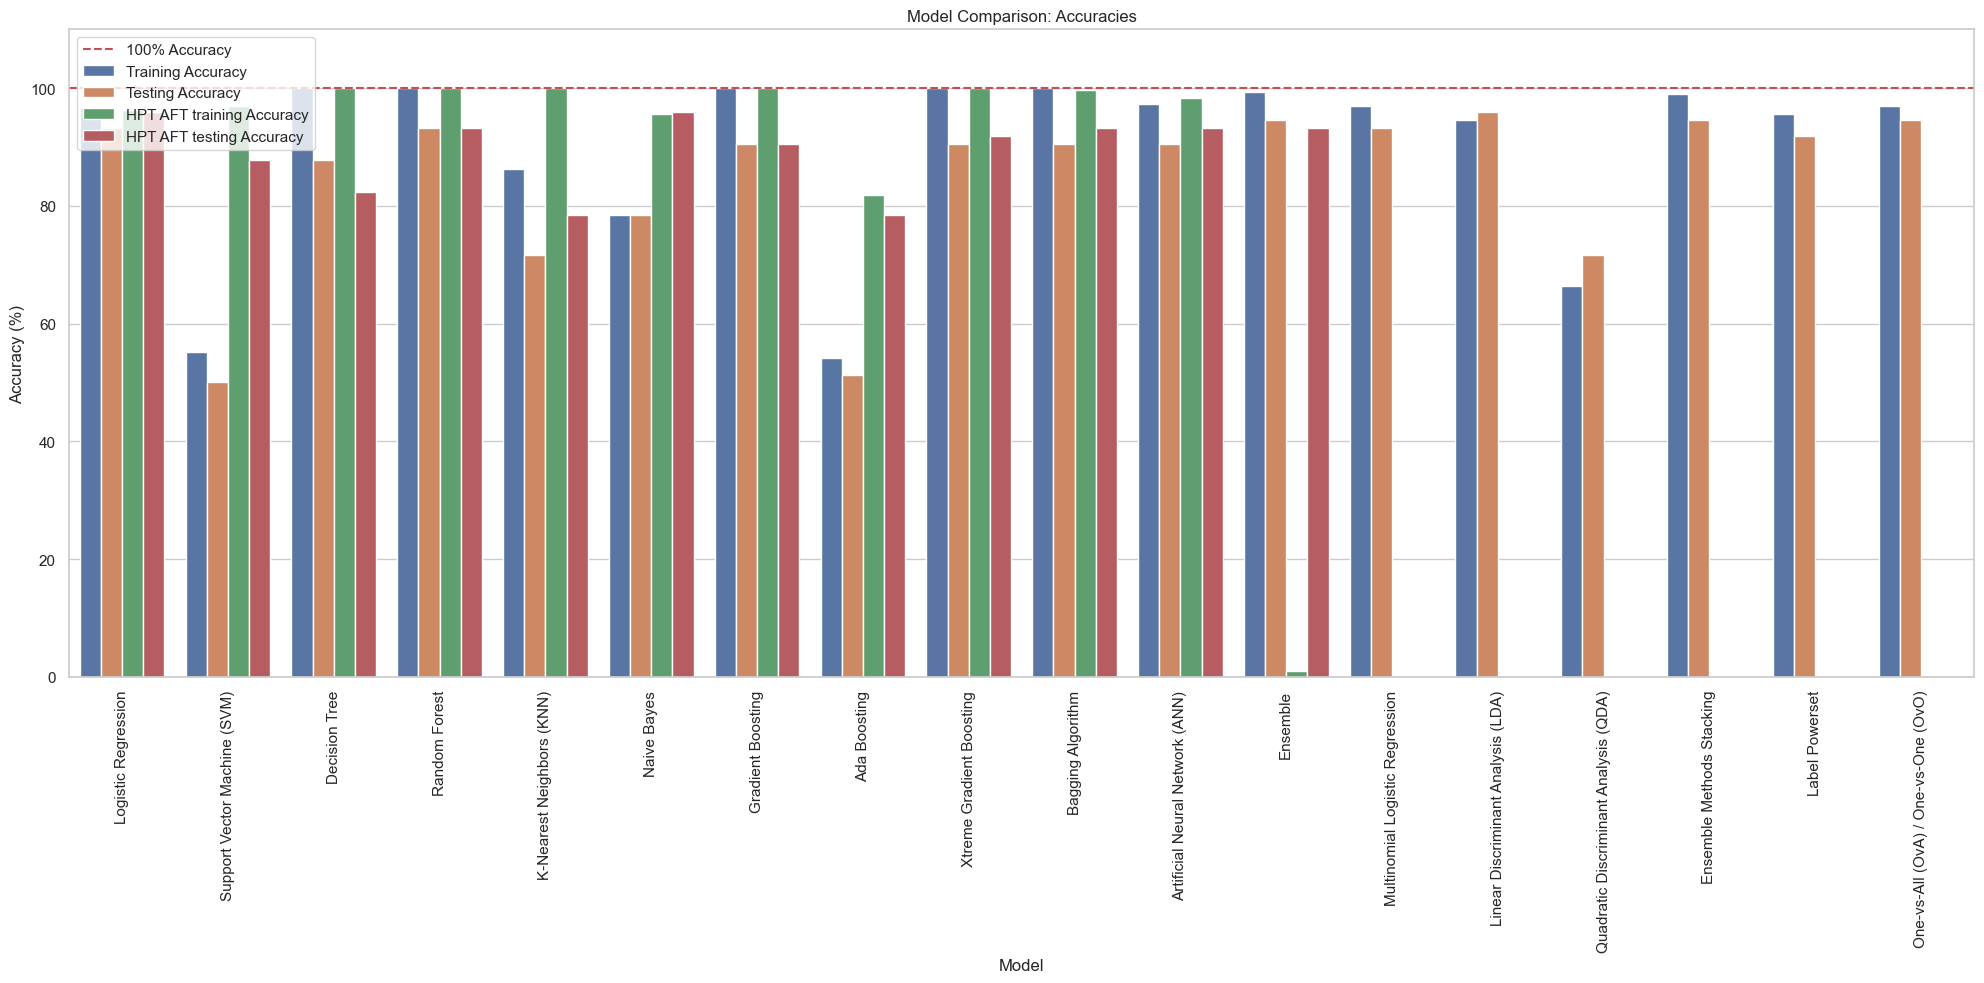

In [283]:
df = pd.DataFrame(Model_performance)

# Set the style
sns.set(style="whitegrid")

# Melt the dataframe for better visualization
df_melted = df.melt(id_vars='Model', 
                     value_vars=['Training Accuracy', 'Testing Accuracy', 
                                 'HPT AFT training Accuracy', 'HPT AFT testing Accuracy'],
                     var_name='Metric', 
                     value_name='Accuracy')

# Create the plot
plt.figure(figsize=(20, 10))
sns.barplot(data=df_melted, x='Model', y='Accuracy', hue='Metric')
plt.title('Model Comparison: Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set limits for better visibility
plt.axhline(y=100, color='r', linestyle='--', label='100% Accuracy')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

#### **Final Conclusion**
* **Logistic Regression:** Good balance with high accuracy on both training and testing (Training: 96.58%, Testing: 93.24%).
* **Random Forest:** Very high training accuracy (100%) but equal testing accuracy (93.24%), which indicates potential overfitting.
* **Gradient Boosting:** Similar to Random Forest with high training (100%) and testing accuracy (90.54%).
* **Artificial Neural Network (ANN):** High training accuracy (97.26%) and testing accuracy (90.54%).
* **Ensemble:** High accuracy on both training (99.32%) and testing (94.59%).
* **Ensemble Methods Stacking:** Good training (98.97%) and testing accuracy (94.59%).
* **Multinomial Logistic Regression:** Also shows high accuracies.

**For a straightforward, robust choice: Logistic Regression.**

**For more advanced modeling: Ensemble Methods Stacking or Gradient Boosting.**

#### **Challenges Faced**
**Data Quality and Preparation:**

* Missing Values: Handling missing or incomplete data required careful imputation or exclusion strategies.
* Data Imbalance: Some classes may have significantly fewer examples, making it challenging to train robust models.
* Feature Engineering: Identifying and creating relevant features that enhance model performance took substantial time and experimentation.

**Model Selection and Hyperparameter Tuning:**

* Algorithm Complexity: Choosing the right algorithm was difficult due to varying performance across different metrics and the risk of overfitting.
* Computational Resources: Some models, like ensemble methods and deep learning models, required extensive computational resources for training and tuning.

**Performance Evaluation:**

* Overfitting vs. Underfitting: Balancing model complexity to avoid overfitting while still capturing the underlying patterns in the data was a constant challenge.

## Final Model Save

In [284]:
import pickle # use for save the model

In [285]:
with open("Skin Disorder.pkl","wb") as f:  # save model
    pickle.dump(LR_HPT_model,f) # save SVM model

In [286]:
with open("Skin Disorder.pkl","rb") as f: # load the model
    Model_new = pickle.load(f) # save as Mdel_new the file for prediction

In [287]:
X_array = np.array(X) # for easy to prediction we save the X in array form

In [288]:
X_array[0] # see the first row of X

array([ 2,  2,  0,  3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  3,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  1,  0, 55],
      dtype=int64)

In [291]:
# see the prediction
Model_new.predict([[2,  2,  0,  3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  3,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  1,  0, 55]]) 

array([2], dtype=int64)

In [293]:
y.head(1) # see the first actual output

0    2
Name: class, dtype: int64

# Thank You......